In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
import pandas as pd
import numpy as np

# 1. Load the CSV file
file_path = '/content/drive/MyDrive/data/processed/unified_countries.csv'
df = pd.read_csv(file_path)

# 3. Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# 4. Convert applicable columns to numeric (safely)
# Skip non-numeric columns like 'STATION', 'NAME', 'DATE', 'Source_*'
non_numeric_cols = ['STATION', 'NAME', 'DATE', 'Source_Station_ID', 'Source_Country_Name', 'Source_Station_Name']
numeric_cols = [col for col in df.columns if col not in non_numeric_cols]

# Convert with errors='coerce' to handle any invalid strings
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 5. Rearrange columns for better structure
reordered_cols = (
    ['Source_Country_Name', 'Source_Station_ID', 'Source_Station_Name',
     'STATION', 'NAME', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION']
    + sorted([col for col in df.columns if col not in [
        'Source_Country_Name', 'Source_Station_ID', 'Source_Station_Name',
        'STATION', 'NAME', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION']])
)
df = df[reordered_cols]

# Renaming for clarity first
df = df.rename(columns={
    'Source_Country_Name': 'COUNTRY',
    'NAME': 'STATION_NAME'
})

df = df.drop(columns=['Source_Station_ID', 'Source_Station_Name'])

# 2. Remove columns with more than 80% missing values
threshold = 0.8
missing_ratio = df.isnull().mean()
df = df.loc[:, missing_ratio <= threshold]

# 6. Save cleaned data
output_path = '/content/drive/MyDrive/data/processed/cleaned_data1.csv'
df.to_csv(output_path, index=False)

print("Cleaning complete. Saved as 'cleaned_data1.csv'")

Cleaning complete. Saved as 'cleaned_data1.csv'


##**Look at cleaned data**

In [179]:
#further testing
df = pd.read_csv("/content/drive/MyDrive/data/processed/cleaned_data1.csv")
df

,COUNTRY,STATION,STATION_NAME,DATE,LATITUDE,LONGITUDE,ELEVATION,CDSD,CLDD,DP01,...,FZF0,FZF5,FZF6,HDSD,HDSD_ATTRIBUTES,HTDD,PRCP,TAVG,TMAX,TMIN
0,Tunisia,TS000060765,"GABES, TS",1887,33.880,10.100,4.0,NaN,NaN,30.0,...,NaN,-0.3,-2.4,NaN,NaN,NaN,134.7,NaN,NaN,12.2
1,Tunisia,TS000060765,"GABES, TS",1889,33.880,10.100,4.0,NaN,NaN,NaN,...,NaN,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7
2,Tunisia,TS000060765,"GABES, TS",1907,33.880,10.100,4.0,NaN,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN
3,Tunisia,TS000060765,"GABES, TS",1908,33.880,10.100,4.0,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,73.9,NaN,NaN,NaN
4,Tunisia,TS000060765,"GABES, TS",1910,33.880,10.100,4.0,NaN,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,147.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51134,Senegal,SG000061687,"TAMBACOUNDA, SG",1981,13.767,-13.683,50.0,NaN,NaN,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,673.5,NaN,35.9,NaN
51135,Senegal,SG000061687,"TAMBACOUNDA, SG",1988,13.767,-13.683,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.4,NaN
51136,Senegal,SG000061687,"TAMBACOUNDA, SG",1990,13.767,-13.683,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,NaN
51137,Senegal,SG000061687,"TAMBACOUNDA, SG",1994,13.767,-13.683,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.9,NaN


In [180]:
df.describe()

,DATE,LATITUDE,LONGITUDE,ELEVATION,CDSD,CLDD,DP01,DP10,DT00,DT32,...,FZF0,FZF5,FZF6,HDSD,HDSD_ATTRIBUTES,HTDD,PRCP,TAVG,TMAX,TMIN
count,51139.000000,51139.000000,51139.000000,51067.000000,38205.000000,38199.000000,42636.000000,42636.000000,41223.000000,41223.000000,...,33154.000000,33322.000000,31409.000000,37930.000000,37930.000000,37928.000000,42682.000000,38848.000000,41237.000000,41223.000000
mean,1974.751071,32.188088,33.631097,373.945293,643.971009,643.839996,120.231471,59.642696,39.348931,126.541712,...,-1.091775,-1.078135,-3.396921,4319.439470,4.182731,4319.495805,780.498836,8.229636,13.595793,3.100956
std,31.971912,33.158155,88.187849,591.915117,956.337583,956.303893,56.788448,37.720668,56.985063,99.516564,...,1.370925,1.380406,1.489757,3317.699712,3.001307,3317.696692,862.391150,11.088121,11.539792,11.000489
min,1781.000000,-90.000000,-179.994700,-23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.200000,-31.100000,-31.100000,0.000000,0.000000,0.000000,0.000000,-51.100000,-47.900000,-54.200000
25%,1956.000000,17.039000,-13.600300,24.000000,21.900000,21.900000,80.000000,32.000000,0.000000,15.000000,...,-1.600000,-1.500000,-3.900000,1417.925000,1.000000,1417.975000,318.800000,0.300000,5.300000,-4.700000
50%,1978.000000,43.437800,43.300000,118.000000,163.500000,163.400000,119.000000,54.000000,2.000000,136.000000,...,-0.800000,-0.700000,-3.000000,3875.550000,4.000000,3875.550000,547.350000,8.200000,13.500000,3.200000
75%,2000.000000,55.733100,108.016700,438.000000,834.700000,833.550000,158.000000,78.000000,69.000000,213.000000,...,-0.200000,-0.200000,-2.500000,6607.475000,7.000000,6607.650000,944.275000,16.700000,22.700000,10.800000
max,2025.000000,82.500000,179.217000,3650.000000,4514.100000,4514.100000,329.000000,260.000000,366.000000,366.000000,...,0.000000,0.000000,-2.200000,25336.100000,9.000000,25336.100000,18805.000000,30.700000,38.600000,27.100000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51139 entries, 0 to 51138
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COUNTRY          51139 non-null  object 
 1   STATION          51139 non-null  object 
 2   STATION_NAME     51139 non-null  object 
 3   DATE             51139 non-null  int64  
 4   LATITUDE         51139 non-null  float64
 5   LONGITUDE        51139 non-null  float64
 6   ELEVATION        51067 non-null  float64
 7   CDSD             38205 non-null  float64
 8   CLDD             38199 non-null  float64
 9   DP01             42636 non-null  float64
 10  DP10             42636 non-null  float64
 11  DT00             41223 non-null  float64
 12  DT32             41223 non-null  float64
 13  DX32             41237 non-null  float64
 14  DX70             41237 non-null  float64
 15  DX90             41237 non-null  float64
 16  EMNT             41223 non-null  float64
 17  EMXP        

##**Ready for Calculations**

In [182]:
# Define columns to group by
group_cols = ['COUNTRY', 'DATE']

# Identify numeric columns to aggregate (excluding the grouping columns)
numeric_cols_for_agg = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols_for_agg = [col for col in numeric_cols_for_agg if col not in group_cols]

# Group by COUNTRY and DATE and calculate the mean of numeric columns
df_grouped = df.groupby(group_cols)[numeric_cols_for_agg].mean().reset_index()

print("Grouped data by Country and Year:")
display(df_grouped)

Grouped data by Country and Year:


,COUNTRY,DATE,LATITUDE,LONGITUDE,ELEVATION,CDSD,CLDD,DP01,DP10,DT00,...,FZF0,FZF5,FZF6,HDSD,HDSD_ATTRIBUTES,HTDD,PRCP,TAVG,TMAX,TMIN
0,Albania,1981,41.4150,19.7210,38.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.80,NaN
1,Albania,2016,41.4150,19.7210,38.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.10,NaN
2,Algeria,1892,30.5667,2.8667,397.0,NaN,NaN,15.0,8.0,0.0,...,-0.5,-1.0,NaN,NaN,NaN,NaN,65.70,NaN,NaN,13.90
3,Algeria,1893,30.5667,2.8667,397.0,NaN,NaN,7.0,4.0,0.0,...,0.0,0.0,-4.0,NaN,NaN,NaN,25.40,NaN,NaN,13.40
4,Algeria,1895,30.5667,2.8667,397.0,NaN,NaN,6.0,0.0,0.0,...,NaN,0.0,-2.6,NaN,NaN,NaN,6.60,NaN,NaN,13.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,Zimbabwe,1985,-19.0585,31.8745,1306.0,632.65,632.65,109.0,69.0,0.0,...,NaN,NaN,NaN,373.30,8.0,373.30,1141.35,18.90,24.25,13.60
9724,Zimbabwe,1986,-19.0585,31.8745,1306.0,560.20,560.20,90.0,57.5,0.0,...,NaN,NaN,NaN,342.30,3.0,342.30,990.55,19.15,24.65,13.60
9725,Zimbabwe,1987,-19.0585,31.8745,1306.0,831.55,831.55,67.0,43.0,0.0,...,NaN,NaN,NaN,328.05,5.5,328.05,616.45,19.95,25.70,14.20
9726,Zimbabwe,1988,-19.0585,31.8745,1306.0,791.35,791.35,92.5,62.0,0.0,...,NaN,NaN,NaN,343.60,6.0,343.60,921.60,19.15,24.75,13.55


In [183]:
df_grouped['COUNTRY'].value_counts()

,count
COUNTRY,
Belgium,177
Germany,169
Austria,167
Australia,165
Croatia,163
...,...
Burma,4
Mali,3
Iraq,3


In [184]:
#Least year among all the countries
df_grouped['DATE'].value_counts()

,count
DATE,
1979,117
1980,117
1981,116
1978,115
1984,114
...,...
1804,1
1805,1
1808,1


In [185]:
output_path = '/content/drive/MyDrive/data/processed/grouped_data1.csv'
df.to_csv(output_path, index=False)

##**Extracting necessary features**

In [186]:
df_grouped = pd.read_csv("/content/drive/MyDrive/data/processed/grouped_data1.csv")
df_grouped

,COUNTRY,STATION,STATION_NAME,DATE,LATITUDE,LONGITUDE,ELEVATION,CDSD,CLDD,DP01,...,FZF0,FZF5,FZF6,HDSD,HDSD_ATTRIBUTES,HTDD,PRCP,TAVG,TMAX,TMIN
0,Tunisia,TS000060765,"GABES, TS",1887,33.880,10.100,4.0,NaN,NaN,30.0,...,NaN,-0.3,-2.4,NaN,NaN,NaN,134.7,NaN,NaN,12.2
1,Tunisia,TS000060765,"GABES, TS",1889,33.880,10.100,4.0,NaN,NaN,NaN,...,NaN,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7
2,Tunisia,TS000060765,"GABES, TS",1907,33.880,10.100,4.0,NaN,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN
3,Tunisia,TS000060765,"GABES, TS",1908,33.880,10.100,4.0,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,73.9,NaN,NaN,NaN
4,Tunisia,TS000060765,"GABES, TS",1910,33.880,10.100,4.0,NaN,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,147.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51134,Senegal,SG000061687,"TAMBACOUNDA, SG",1981,13.767,-13.683,50.0,NaN,NaN,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,673.5,NaN,35.9,NaN
51135,Senegal,SG000061687,"TAMBACOUNDA, SG",1988,13.767,-13.683,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.4,NaN
51136,Senegal,SG000061687,"TAMBACOUNDA, SG",1990,13.767,-13.683,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,NaN
51137,Senegal,SG000061687,"TAMBACOUNDA, SG",1994,13.767,-13.683,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.9,NaN


In [187]:
df_grouped.columns

Index(['COUNTRY', 'STATION', 'STATION_NAME', 'DATE', 'LATITUDE', 'LONGITUDE',
       'ELEVATION', 'CDSD', 'CLDD', 'DP01', 'DP10', 'DT00', 'DT32', 'DX32',
       'DX70', 'DX90', 'EMNT', 'EMXP', 'EMXT', 'FZF0', 'FZF5', 'FZF6', 'HDSD',
       'HDSD_ATTRIBUTES', 'HTDD', 'PRCP', 'TAVG', 'TMAX', 'TMIN'],
      dtype='object')

In [188]:
#Checking if how many countries
df_grouped['COUNTRY'].nunique()

150

In [189]:
# Get the set of unique years for each country
years_by_country = df_grouped.groupby('COUNTRY')['DATE'].apply(set)

# Find the intersection of all the sets of years
common_years = set.intersection(*years_by_country)

# Convert the resulting set to a sorted list for easier viewing
common_years_list = sorted(list(common_years))

print("Years present in all countries:")
print(common_years_list)

# If you want to know the minimum of these common years:
if common_years_list:
    oldest_common_year = common_years_list[0]
    print(f"\nThe oldest year present in all countries is: {oldest_common_year}")
else:
    print("\nThere are no years that are present in all countries.")

Years present in all countries:
[]

There are no years that are present in all countries.


In [190]:
#Now since that no year that is present in all of the countries...let's see if 90% countries have the common date

In [191]:
# Calculate the number of countries
total_countries = df_grouped['COUNTRY'].nunique()

# Count how many countries have data for each year
country_counts_by_year = df_grouped.groupby('DATE')['COUNTRY'].nunique()

# Calculate the percentage of countries with data for each year
percentage_countries_by_year = (country_counts_by_year / total_countries) * 100

# Define the threshold (90%)
percentage_threshold = 75

# Find the years where the percentage of countries is above the threshold
years_with_sufficient_data = percentage_countries_by_year[percentage_countries_by_year >= percentage_threshold].index.tolist()

print(f"Years present in at least {percentage_threshold}% of countries:")
print(years_with_sufficient_data)

# Filter the grouped DataFrame to keep only the countries that have data in any of the years with sufficient data
if years_with_sufficient_data:
    countries_to_keep = df_grouped[df_grouped['DATE'].isin(years_with_sufficient_data)]['COUNTRY'].unique()
    df_filtered = df_grouped[df_grouped['COUNTRY'].isin(countries_to_keep)].copy()
    print("\nFiltered DataFrame containing countries with data in the identified common years:")
    display(df_filtered)
    print(f"\nNumber of countries in the filtered DataFrame: {df_filtered['COUNTRY'].nunique()}")
else:
    df_filtered = pd.DataFrame() # Create an empty DataFrame if no years meet the criteria
    print("\nNo years found that are present in at least 90% of countries. The filtered DataFrame is empty.")

Years present in at least 75% of countries:
[1978, 1979, 1980, 1981, 1984]

Filtered DataFrame containing countries with data in the identified common years:


,COUNTRY,STATION,STATION_NAME,DATE,LATITUDE,LONGITUDE,ELEVATION,CDSD,CLDD,DP01,...,FZF0,FZF5,FZF6,HDSD,HDSD_ATTRIBUTES,HTDD,PRCP,TAVG,TMAX,TMIN
0,Tunisia,TS000060765,"GABES, TS",1887,33.880,10.100,4.0,NaN,NaN,30.0,...,NaN,-0.3,-2.4,NaN,NaN,NaN,134.7,NaN,NaN,12.2
1,Tunisia,TS000060765,"GABES, TS",1889,33.880,10.100,4.0,NaN,NaN,NaN,...,NaN,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7
2,Tunisia,TS000060765,"GABES, TS",1907,33.880,10.100,4.0,NaN,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN
3,Tunisia,TS000060765,"GABES, TS",1908,33.880,10.100,4.0,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,73.9,NaN,NaN,NaN
4,Tunisia,TS000060765,"GABES, TS",1910,33.880,10.100,4.0,NaN,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,147.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51134,Senegal,SG000061687,"TAMBACOUNDA, SG",1981,13.767,-13.683,50.0,NaN,NaN,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,673.5,NaN,35.9,NaN
51135,Senegal,SG000061687,"TAMBACOUNDA, SG",1988,13.767,-13.683,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.4,NaN
51136,Senegal,SG000061687,"TAMBACOUNDA, SG",1990,13.767,-13.683,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,NaN
51137,Senegal,SG000061687,"TAMBACOUNDA, SG",1994,13.767,-13.683,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.9,NaN



Number of countries in the filtered DataFrame: 130


In [192]:
#Finding the features: like % increase/change in the temperature/other factors for each country and then taking them separate -> Since not all countries have all the years, we'll calculate 'a value' for each country -> which says that:    The % change in factor x in years around 2000s and in years around 2020s was highest in these 10 countries.

In [193]:
# Define the time periods
start_year_period1 = 2000
end_year_period1 = 2012
start_year_period2 = 2013
end_year_period2 = 2025

# Filter df_filtered for the first time period (around 2000s)
df_period1 = df_grouped[(df_grouped['DATE'] >= start_year_period1) & (df_grouped['DATE'] <= end_year_period1)].copy()

# Filter df_filtered for the second time period (around 2020s)
df_period2 = df_grouped[(df_filtered['DATE'] >= start_year_period2) & (df_grouped['DATE'] <= end_year_period2)].copy()

print("Data filtered for Period 1 (2000-2010):")
display(df_period1)

print("\nData filtered for Period 2 (2015-2020):")
display(df_period2)

print(df_period1['COUNTRY'].nunique())
print(df_period2['COUNTRY'].nunique())

Data filtered for Period 1 (2000-2010):


,COUNTRY,STATION,STATION_NAME,DATE,LATITUDE,LONGITUDE,ELEVATION,CDSD,CLDD,DP01,...,FZF0,FZF5,FZF6,HDSD,HDSD_ATTRIBUTES,HTDD,PRCP,TAVG,TMAX,TMIN
49,Tunisia,TS000060765,"GABES, TS",2005,33.880,10.100,4.0,NaN,NaN,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,146.5,NaN,NaN,NaN
50,Tunisia,TS000060765,"GABES, TS",2006,33.880,10.100,4.0,NaN,NaN,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,399.5,NaN,NaN,NaN
51,Tunisia,TS000060765,"GABES, TS",2007,33.880,10.100,4.0,NaN,NaN,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,351.0,NaN,NaN,NaN
52,Tunisia,TS000060765,"GABES, TS",2008,33.880,10.100,4.0,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,132.3,NaN,NaN,NaN
53,Tunisia,TS000060765,"GABES, TS",2009,33.880,10.100,4.0,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,155.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51029,Wallis and Futuna [France],WF000917530,"HIHIFO ILE WALLIS, WF",2012,-13.233,-176.167,27.0,NaN,NaN,245.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2965.7,27.6,30.4,24.7
51126,Senegal,SG000061612,"PODOR, SG",2009,16.633,-14.917,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN
51127,Senegal,SG000061612,"PODOR, SG",2010,16.633,-14.917,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.1,NaN
51128,Senegal,SG000061612,"PODOR, SG",2011,16.633,-14.917,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5,NaN



Data filtered for Period 2 (2015-2020):


,COUNTRY,STATION,STATION_NAME,DATE,LATITUDE,LONGITUDE,ELEVATION,CDSD,CLDD,DP01,...,FZF0,FZF5,FZF6,HDSD,HDSD_ATTRIBUTES,HTDD,PRCP,TAVG,TMAX,TMIN
56,Tunisia,TS000060765,"GABES, TS",2022,33.880,10.100,4.0,NaN,NaN,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.2,NaN,NaN,NaN
89,Tunisia,TS000060725,"JENDOUBA, TS",2014,36.480,8.800,143.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,490.9,NaN,NaN,NaN
90,Tunisia,TS000060725,"JENDOUBA, TS",2016,36.480,8.800,143.0,NaN,NaN,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,394.3,NaN,NaN,NaN
91,Tunisia,TS000060725,"JENDOUBA, TS",2018,36.480,8.800,143.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,500.4,NaN,NaN,NaN
92,Tunisia,TS000060725,"JENDOUBA, TS",2019,36.480,8.800,143.0,NaN,NaN,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,465.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51038,Wallis and Futuna [France],WF000917530,"HIHIFO ILE WALLIS, WF",2021,-13.233,-176.167,27.0,NaN,NaN,254.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2504.5,NaN,NaN,NaN
51039,Wallis and Futuna [France],WF000917530,"HIHIFO ILE WALLIS, WF",2022,-13.233,-176.167,27.0,NaN,NaN,285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2247.8,NaN,NaN,NaN
51040,Wallis and Futuna [France],WF000917530,"HIHIFO ILE WALLIS, WF",2023,-13.233,-176.167,27.0,NaN,NaN,264.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2751.9,NaN,NaN,NaN
51041,Wallis and Futuna [France],WF000917530,"HIHIFO ILE WALLIS, WF",2024,-13.233,-176.167,27.0,NaN,NaN,243.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2268.9,NaN,NaN,NaN


124
97


##**Let's find most drastic changes**

In [194]:
# Calculate the average TAVG for each country in period 1
avg_tavg_period1 = df_period1.groupby('COUNTRY')['TAVG'].mean().reset_index()
avg_tavg_period1.rename(columns={'TAVG': 'Avg_TAVG_Period1'}, inplace=True)

# Calculate the average TAVG for each country in period 2
avg_tavg_period2 = df_period2.groupby('COUNTRY')['TAVG'].mean().reset_index()
avg_tavg_period2.rename(columns={'TAVG': 'Avg_TAVG_Period2'}, inplace=True)

print("Average TAVG per country for Period 1 (2000-2012):")
display(avg_tavg_period1.head())

print("\nAverage TAVG per country for Period 2 (2013-2025):")
display(avg_tavg_period2.head())

Average TAVG per country for Period 1 (2000-2012):


,COUNTRY,Avg_TAVG_Period1
0,Algeria,NaN
1,American Samoa [United States],27.992308
2,Antarctica,-6.014286
3,Argentina,15.982432
4,Armenia,NaN



Average TAVG per country for Period 2 (2013-2025):


,COUNTRY,Avg_TAVG_Period2
0,Albania,NaN
1,Algeria,NaN
2,American Samoa [United States],27.850000
3,Antarctica,-12.314286
4,Argentina,NaN


In [195]:
# Merge the two dataframes on the 'COUNTRY' column
tavg_change = pd.merge(avg_tavg_period1, avg_tavg_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in TAVG
# Avoid division by zero or calculating change from NaN
tavg_change['TAVG_Change_Percent'] = ((tavg_change['Avg_TAVG_Period2'] - tavg_change['Avg_TAVG_Period1']) / tavg_change['Avg_TAVG_Period1']) * 100

# Display the results, sorting by the percentage change to see the most drastic changes
print("Percentage Change in Average TAVG per Country (Period 1 to Period 2):")
display(tavg_change.sort_values(by='TAVG_Change_Percent', ascending=False).head(10))

Percentage Change in Average TAVG per Country (Period 1 to Period 2):


,COUNTRY,Avg_TAVG_Period1,Avg_TAVG_Period2,TAVG_Change_Percent
3,Antarctica,-6.014286,-12.314286,104.750594
58,Jan Mayen [Norway],0.653846,1.158333,77.156863
46,Greenland [Denmark],-4.534783,-6.284615,38.586916
39,Finland,3.005128,3.741667,24.509386
7,Austria,5.635897,6.460000,14.622384
103,Slovakia,7.000000,7.962500,13.750000
34,Estonia,6.323077,7.118182,12.574652
51,India,24.960000,27.381818,9.702797
44,Germany,9.571154,10.379167,8.442167
117,Ukraine,9.313462,10.046429,7.869974


In [196]:
# Calculate the average TMIN for each country in period 1
avg_tmin_period1 = df_period1.groupby('COUNTRY')['TMIN'].mean().reset_index()
avg_tmin_period1.rename(columns={'TMIN': 'Avg_TMIN_Period1'}, inplace=True)

# Calculate the average TMIN for each country in period 2
avg_tmin_period2 = df_period2.groupby('COUNTRY')['TMIN'].mean().reset_index()
avg_tmin_period2.rename(columns={'TMIN': 'Avg_TMIN_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
tmin_change = pd.merge(avg_tmin_period1, avg_tmin_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in TMIN
tmin_change['TMIN_Change_Percent'] = ((tmin_change['Avg_TMIN_Period2'] - tmin_change['Avg_TMIN_Period1']) / tmin_change['Avg_TMIN_Period1']) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average TMIN per Country (Period 1 to Period 2):")
display(tmin_change.sort_values(by='TMIN_Change_Percent', ascending=False).head(10))

Percentage Change in Average TMIN per Country (Period 1 to Period 2):


,COUNTRY,Avg_TMIN_Period1,Avg_TMIN_Period2,TMIN_Change_Percent
3,Antarctica,-9.106667,-16.162500,77.479868
114,Turkey,9.530435,16.166667,69.631995
103,Slovakia,1.569231,2.475000,57.720588
7,Austria,2.115385,2.903333,37.248485
100,Saudi Arabia,20.144444,26.850000,33.287369
34,Estonia,2.492308,3.281818,31.677890
97,Romania,2.843333,3.604545,26.771821
46,Greenland [Denmark],-8.012500,-9.257143,15.533764
21,Chile,8.820000,10.075000,14.229025
117,Ukraine,4.675000,5.339286,14.209320


In [197]:
# Calculate the average TMAX for each country in period 1
avg_tmax_period1 = df_period1.groupby('COUNTRY')['TMAX'].mean().reset_index()
avg_tmax_period1.rename(columns={'TMAX': 'Avg_TMAX_Period1'}, inplace=True)

# Calculate the average TMAX for each country in period 2
avg_tmax_period2 = df_period2.groupby('COUNTRY')['TMAX'].mean().reset_index()
avg_tmax_period2.rename(columns={'TMAX': 'Avg_TMAX_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
tmax_change = pd.merge(avg_tmax_period1, avg_tmax_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in TMAX
tmax_change['TMAX_Change_Percent'] = ((tmax_change['Avg_TMAX_Period2'] - tmax_change['Avg_TMAX_Period1']) / tmax_change['Avg_TMAX_Period1']) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average TMAX per Country (Period 1 to Period 2):")
display(tmax_change.sort_values(by='TMAX_Change_Percent', ascending=False).head(10))

Percentage Change in Average TMAX per Country (Period 1 to Period 2):


,COUNTRY,Avg_TMAX_Period1,Avg_TMAX_Period2,TMAX_Change_Percent
46,Greenland [Denmark],-0.896154,-2.578571,187.737584
3,Antarctica,-3.173333,-8.925000,181.250000
56,Italy,14.719444,20.500000,39.271561
97,Romania,9.270588,12.762500,37.666561
110,Switzerland,2.161538,2.971429,37.468226
98,Russia,2.615179,3.573549,36.646444
60,Kazakhstan,12.856757,15.247222,18.593068
58,Jan Mayen [Norway],2.476923,2.908333,17.417184
7,Austria,9.146154,10.421875,13.948171
63,"Korea, North",12.325000,13.966667,13.319811


In [198]:
# Calculate the average PRCP for each country in period 1
avg_prcp_period1 = df_period1.groupby('COUNTRY')['PRCP'].mean().reset_index()
avg_prcp_period1.rename(columns={'PRCP': 'Avg_PRCP_Period1'}, inplace=True)

# Calculate the average PRCP for each country in period 2
avg_prcp_period2 = df_period2.groupby('COUNTRY')['PRCP'].mean().reset_index()
avg_prcp_period2.rename(columns={'PRCP': 'Avg_PRCP_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
prcp_change = pd.merge(avg_prcp_period1, avg_prcp_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in PRCP
# Add a small epsilon to the denominator to avoid division by zero for countries with zero precipitation in period 1
epsilon = 1e-9
prcp_change['PRCP_Change_Percent'] = ((prcp_change['Avg_PRCP_Period2'] - prcp_change['Avg_PRCP_Period1']) / (prcp_change['Avg_PRCP_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average PRCP per Country (Period 1 to Period 2):")
display(prcp_change.sort_values(by='PRCP_Change_Percent', ascending=False).head())

Percentage Change in Average PRCP per Country (Period 1 to Period 2):


,COUNTRY,Avg_PRCP_Period1,Avg_PRCP_Period2,PRCP_Change_Percent
55,Israel,13.415385,20.750000,54.673165
105,South Africa,1449.812500,2098.400000,44.735957
108,Svalbard [Norway],175.000000,243.066667,38.895238
121,Uruguay,954.950000,1214.461111,27.175361
97,Romania,549.465385,676.983871,23.207738


In [199]:
# Calculate the average CDSD for each country in period 1
avg_cdsd_period1 = df_period1.groupby('COUNTRY')['CDSD'].mean().reset_index()
avg_cdsd_period1.rename(columns={'CDSD': 'Avg_CDSD_Period1'}, inplace=True)

# Calculate the average CDSD for each country in period 2
avg_cdsd_period2 = df_period2.groupby('COUNTRY')['CDSD'].mean().reset_index()
avg_cdsd_period2.rename(columns={'CDSD': 'Avg_CDSD_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
cdsd_change = pd.merge(avg_cdsd_period1, avg_cdsd_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in CDSD
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
cdsd_change['CDSD_Change_Percent'] = ((cdsd_change['Avg_CDSD_Period2'] - cdsd_change['Avg_CDSD_Period1']) / (cdsd_change['Avg_CDSD_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average CDSD per Country (Period 1 to Period 2):")
display(cdsd_change.sort_values(by='CDSD_Change_Percent', ascending=False).head())

Percentage Change in Average CDSD per Country (Period 1 to Period 2):


,COUNTRY,Avg_CDSD_Period1,Avg_CDSD_Period2,CDSD_Change_Percent
108,Svalbard [Norway],0.000000,0.025000,2.500000e+09
110,Switzerland,0.000000,0.010000,1.000000e+09
54,Ireland,1.200000,2.454545,1.045455e+02
86,Norway,4.220000,7.470213,7.701926e+01
103,Slovakia,53.569231,78.000000,4.560597e+01


In [200]:
# Calculate the average CLDD for each country in period 1
avg_cldd_period1 = df_period1.groupby('COUNTRY')['CLDD'].mean().reset_index()
avg_cldd_period1.rename(columns={'CLDD': 'Avg_CLDD_Period1'}, inplace=True)

# Calculate the average CLDD for each country in period 2
avg_cldd_period2 = df_period2.groupby('COUNTRY')['CLDD'].mean().reset_index()
avg_cldd_period2.rename(columns={'CLDD': 'Avg_CLDD_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
cldd_change = pd.merge(avg_cldd_period1, avg_cldd_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in CLDD
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
cldd_change['CLDD_Change_Percent'] = ((cldd_change['Avg_CLDD_Period2'] - cldd_change['Avg_CLDD_Period1']) / (cldd_change['Avg_CLDD_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average CLDD per Country (Period 1 to Period 2):")
display(cldd_change.sort_values(by='CLDD_Change_Percent', ascending=False).head())

Percentage Change in Average CLDD per Country (Period 1 to Period 2):


,COUNTRY,Avg_CLDD_Period1,Avg_CLDD_Period2,CLDD_Change_Percent
108,Svalbard [Norway],0.000000,0.025000,2.500000e+09
110,Switzerland,0.000000,0.010000,1.000000e+09
54,Ireland,1.200000,2.454545,1.045455e+02
86,Norway,4.220000,7.470213,7.701926e+01
103,Slovakia,53.569231,78.000000,4.560597e+01


In [201]:
# Calculate the average DP01 for each country in period 1
avg_dp01_period1 = df_period1.groupby('COUNTRY')['DP01'].mean().reset_index()
avg_dp01_period1.rename(columns={'DP01': 'Avg_DP01_Period1'}, inplace=True)

# Calculate the average DP01 for each country in period 2
avg_dp01_period2 = df_period2.groupby('COUNTRY')['DP01'].mean().reset_index()
avg_dp01_period2.rename(columns={'DP01': 'Avg_DP01_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
dp01_change = pd.merge(avg_dp01_period1, avg_dp01_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in DP01
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
dp01_change['DP01_Change_Percent'] = ((dp01_change['Avg_DP01_Period2'] - dp01_change['Avg_DP01_Period1']) / (dp01_change['Avg_DP01_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average DP01 per Country (Period 1 to Period 2):")
display(dp01_change.sort_values(by='DP01_Change_Percent', ascending=False).head())

Percentage Change in Average DP01 per Country (Period 1 to Period 2):


,COUNTRY,Avg_DP01_Period1,Avg_DP01_Period2,DP01_Change_Percent
105,South Africa,179.375000,287.000000,60.000000
108,Svalbard [Norway],74.000000,117.000000,58.108108
113,Tunisia,67.857143,87.285714,28.631579
20,Cayman Islands [United Kingdom],89.000000,107.000000,20.224719
121,Uruguay,79.000000,94.833333,20.042194


In [202]:
# Calculate the average DP10 for each country in period 1
avg_dp10_period1 = df_period1.groupby('COUNTRY')['DP10'].mean().reset_index()
avg_dp10_period1.rename(columns={'DP10': 'Avg_DP10_Period1'}, inplace=True)

# Calculate the average DP10 for each country in period 2
avg_dp10_period2 = df_period2.groupby('COUNTRY')['DP10'].mean().reset_index()
avg_dp10_period2.rename(columns={'DP10': 'Avg_DP10_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
dp10_change = pd.merge(avg_dp10_period1, avg_dp10_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in DP10
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
dp10_change['DP10_Change_Percent'] = ((dp10_change['Avg_DP10_Period2'] - dp10_change['Avg_DP10_Period1']) / (dp10_change['Avg_DP10_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average DP10 per Country (Period 1 to Period 2):")
display(dp10_change.sort_values(by='DP10_Change_Percent', ascending=False).head())

Percentage Change in Average DP10 per Country (Period 1 to Period 2):


,COUNTRY,Avg_DP10_Period1,Avg_DP10_Period2,DP10_Change_Percent
105,South Africa,99.000000,175.000000,76.767677
108,Svalbard [Norway],19.000000,30.000000,57.894737
55,Israel,1.538462,2.000000,30.000000
79,Morocco,13.000000,15.833333,21.794872
113,Tunisia,28.857143,34.857143,20.792079


In [203]:
# Calculate the average DT00 for each country in period 1
avg_dt00_period1 = df_period1.groupby('COUNTRY')['DT00'].mean().reset_index()
avg_dt00_period1.rename(columns={'DT00': 'Avg_DT00_Period1'}, inplace=True)

# Calculate the average DT00 for each country in period 2
avg_dt00_period2 = df_period2.groupby('COUNTRY')['DT00'].mean().reset_index()
avg_dt00_period2.rename(columns={'DT00': 'Avg_DT00_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
dt00_change = pd.merge(avg_dt00_period1, avg_dt00_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in DT00
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
dt00_change['DT00_Change_Percent'] = ((dt00_change['Avg_DT00_Period2'] - dt00_change['Avg_DT00_Period1']) / (dt00_change['Avg_DT00_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average DT00 per Country (Period 1 to Period 2):")
display(dt00_change.sort_values(by='DT00_Change_Percent', ascending=False).head())

Percentage Change in Average DT00 per Country (Period 1 to Period 2):


,COUNTRY,Avg_DT00_Period1,Avg_DT00_Period2,DT00_Change_Percent
3,Antarctica,65.333333,153.875000,135.522959
46,Greenland [Denmark],75.750000,91.071429,20.226308
109,Sweden,8.583333,9.371429,9.181692
122,Uzbekistan,2.954545,3.000000,1.538462
19,Canada,91.309365,92.313008,1.099168


In [204]:
# Calculate the average DT32 for each country in period 1
avg_dt32_period1 = df_period1.groupby('COUNTRY')['DT32'].mean().reset_index()
avg_dt32_period1.rename(columns={'DT32': 'Avg_DT32_Period1'}, inplace=True)

# Calculate the average DT32 for each country in period 2
avg_dt32_period2 = df_period2.groupby('COUNTRY')['DT32'].mean().reset_index()
avg_dt32_period2.rename(columns={'DT32': 'Avg_DT32_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
dt32_change = pd.merge(avg_dt32_period1, avg_dt32_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in DT32
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
dt32_change['DT32_Change_Percent'] = ((dt32_change['Avg_DT32_Period2'] - dt32_change['Avg_DT32_Period1']) / (dt32_change['Avg_DT32_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average DT32 per Country (Period 1 to Period 2):")
display(dt32_change.sort_values(by='DT32_Change_Percent', ascending=False).head())

Percentage Change in Average DT32 per Country (Period 1 to Period 2):


,COUNTRY,Avg_DT32_Period1,Avg_DT32_Period2,DT32_Change_Percent
51,India,0.000000,4.781250,4.781250e+11
15,Bolivia,0.000000,1.444444,1.444444e+11
85,Niger,0.000000,0.200000,2.000000e+10
21,Chile,9.000000,12.750000,4.166667e+01
121,Uruguay,9.607143,12.071429,2.565056e+01


In [205]:
# Calculate the average DX32 for each country in period 1
avg_dx32_period1 = df_period1.groupby('COUNTRY')['DX32'].mean().reset_index()
avg_dx32_period1.rename(columns={'DX32': 'Avg_DX32_Period1'}, inplace=True)

# Calculate the average DX32 for each country in period 2
avg_dx32_period2 = df_period2.groupby('COUNTRY')['DX32'].mean().reset_index()
avg_dx32_period2.rename(columns={'DX32': 'Avg_DX32_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
dx32_change = pd.merge(avg_dx32_period1, avg_dx32_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in DX32
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
dx32_change['DX32_Change_Percent'] = ((dx32_change['Avg_DX32_Period2'] - dx32_change['Avg_DX32_Period1']) / (dx32_change['Avg_DX32_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average DX32 per Country (Period 1 to Period 2):")
display(dx32_change.sort_values(by='DX32_Change_Percent', ascending=False).head())

Percentage Change in Average DX32 per Country (Period 1 to Period 2):


,COUNTRY,Avg_DX32_Period1,Avg_DX32_Period2,DX32_Change_Percent
3,Antarctica,209.666667,306.125000,46.005564
46,Greenland [Denmark],168.115385,195.428571,16.246691
86,Norway,74.196970,75.354167,1.559628
109,Sweden,54.375000,55.142857,1.412151
19,Canada,148.081126,148.971193,0.601068


In [206]:
# Calculate the average DX70 for each country in period 1
avg_dx70_period1 = df_period1.groupby('COUNTRY')['DX70'].mean().reset_index()
avg_dx70_period1.rename(columns={'DX70': 'Avg_DX70_Period1'}, inplace=True)

# Calculate the average DX70 for each country in period 2
avg_dx70_period2 = df_period2.groupby('COUNTRY')['DX70'].mean().reset_index()
avg_dx70_period2.rename(columns={'DX70': 'Avg_DX70_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
dx70_change = pd.merge(avg_dx70_period1, avg_dx70_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in DX70
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
dx70_change['DX70_Change_Percent'] = ((dx70_change['Avg_DX70_Period2'] - dx70_change['Avg_DX70_Period1']) / (dx70_change['Avg_DX70_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average DX70 per Country (Period 1 to Period 2):")
display(dx70_change.sort_values(by='DX70_Change_Percent', ascending=False).head())

Percentage Change in Average DX70 per Country (Period 1 to Period 2):


,COUNTRY,Avg_DX70_Period1,Avg_DX70_Period2,DX70_Change_Percent
108,Svalbard [Norway],0.000000,0.166667,1.666667e+10
110,Switzerland,0.076923,0.333333,3.333333e+02
56,Italy,103.027778,162.666667,5.788622e+01
86,Norway,7.106061,10.250000,4.424307e+01
97,Romania,72.352941,102.375000,4.149390e+01


In [207]:
# Calculate the average DX90 for each country in period 1
avg_dx90_period1 = df_period1.groupby('COUNTRY')['DX90'].mean().reset_index()
avg_dx90_period1.rename(columns={'DX90': 'Avg_DX90_Period1'}, inplace=True)

# Calculate the average DX90 for each country in period 2
avg_dx90_period2 = df_period2.groupby('COUNTRY')['DX90'].mean().reset_index()
avg_dx90_period2.rename(columns={'DX90': 'Avg_DX90_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
dx90_change = pd.merge(avg_dx90_period1, avg_dx90_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in DX90
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
dx90_change['DX90_Change_Percent'] = ((dx90_change['Avg_DX90_Period2'] - dx90_change['Avg_DX90_Period1']) / (dx90_change['Avg_DX90_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average DX90 per Country (Period 1 to Period 2):")
display(dx90_change.sort_values(by='DX90_Change_Percent', ascending=False).head())

Percentage Change in Average DX90 per Country (Period 1 to Period 2):


,COUNTRY,Avg_DX90_Period1,Avg_DX90_Period2,DX90_Change_Percent
119,United Kingdom,0.000000,0.075758,7.575758e+09
109,Sweden,0.000000,0.057143,5.714286e+09
81,Nepal,2.000000,13.000000,5.500000e+02
97,Romania,1.882353,7.500000,2.984375e+02
103,Slovakia,0.692308,2.375000,2.430556e+02


In [208]:
# Calculate the average EMNT for each country in period 1
avg_emnt_period1 = df_period1.groupby('COUNTRY')['EMNT'].mean().reset_index()
avg_emnt_period1.rename(columns={'EMNT': 'Avg_EMNT_Period1'}, inplace=True)

# Calculate the average EMNT for each country in period 2
avg_emnt_period2 = df_period2.groupby('COUNTRY')['EMNT'].mean().reset_index()
avg_emnt_period2.rename(columns={'EMNT': 'Avg_EMNT_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
emnt_change = pd.merge(avg_emnt_period1, avg_emnt_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in EMNT
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
emnt_change['EMNT_Change_Percent'] = ((emnt_change['Avg_EMNT_Period2'] - emnt_change['Avg_EMNT_Period1']) / (emnt_change['Avg_EMNT_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average EMNT per Country (Period 1 to Period 2):")
display(emnt_change.sort_values(by='EMNT_Change_Percent', ascending=False).head())

Percentage Change in Average EMNT per Country (Period 1 to Period 2):


,COUNTRY,Avg_EMNT_Period1,Avg_EMNT_Period2,EMNT_Change_Percent
21,Chile,0.180000,1.1750,552.777775
100,Saudi Arabia,3.088889,18.4000,495.683453
51,India,5.516667,8.9375,62.009063
76,Mexico,9.200000,11.9000,29.347826
29,Cyprus,1.569231,2.0000,27.450980


In [209]:
# Calculate the average EMXP for each country in period 1
avg_emxp_period1 = df_period1.groupby('COUNTRY')['EMXP'].mean().reset_index()
avg_emxp_period1.rename(columns={'EMXP': 'Avg_EMXP_Period1'}, inplace=True)

# Calculate the average EMXP for each country in period 2
avg_emxp_period2 = df_period2.groupby('COUNTRY')['EMXP'].mean().reset_index()
avg_emxp_period2.rename(columns={'EMXP': 'Avg_EMXP_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
emxp_change = pd.merge(avg_emxp_period1, avg_emxp_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in EMXP
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
emxp_change['EMXP_Change_Percent'] = ((emxp_change['Avg_EMXP_Period2'] - emxp_change['Avg_EMXP_Period1']) / (emxp_change['Avg_EMXP_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average EMXP per Country (Period 1 to Period 2):")
display(emxp_change.sort_values(by='EMXP_Change_Percent', ascending=False).head())

Percentage Change in Average EMXP per Country (Period 1 to Period 2):


,COUNTRY,Avg_EMXP_Period1,Avg_EMXP_Period2,EMXP_Change_Percent
16,Bosnia and Herzegovina,73.250000,108.866667,48.623436
102,Seychelles,136.683333,189.300000,38.495305
55,Israel,7.246154,9.616667,32.714084
1,Algeria,25.308333,32.911111,30.040610
27,Croatia,40.784615,52.700000,29.215390


In [210]:
# Calculate the average EMXT for each country in period 1
avg_emxt_period1 = df_period1.groupby('COUNTRY')['EMXT'].mean().reset_index()
avg_emxt_period1.rename(columns={'EMXT': 'Avg_EMXT_Period1'}, inplace=True)

# Calculate the average EMXT for each country in period 2
avg_emxt_period2 = df_period2.groupby('COUNTRY')['EMXT'].mean().reset_index()
avg_emxt_period2.rename(columns={'EMXT': 'Avg_EMXT_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
emxt_change = pd.merge(avg_emxt_period1, avg_emxt_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in EMXT
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
emxt_change['EMXT_Change_Percent'] = ((emxt_change['Avg_EMXT_Period2'] - emxt_change['Avg_EMXT_Period1']) / (emxt_change['Avg_EMXT_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average EMXT per Country (Period 1 to Period 2):")
display(emxt_change.sort_values(by='EMXT_Change_Percent', ascending=False).head())

Percentage Change in Average EMXT per Country (Period 1 to Period 2):


,COUNTRY,Avg_EMXT_Period1,Avg_EMXT_Period2,EMXT_Change_Percent
97,Romania,26.676471,30.362500,13.817530
56,Italy,31.141667,34.733333,11.533315
108,Svalbard [Norway],14.961538,16.158333,7.999143
84,New Zealand,27.136000,29.013043,6.917171
87,Oman,41.010000,43.833333,6.884500


In [211]:
# Calculate the average FZF0 for each country in period 1
avg_fzf0_period1 = df_period1.groupby('COUNTRY')['FZF0'].mean().reset_index()
avg_fzf0_period1.rename(columns={'FZF0': 'Avg_FZF0_Period1'}, inplace=True)

# Calculate the average FZF0 for each country in period 2
avg_fzf0_period2 = df_period2.groupby('COUNTRY')['FZF0'].mean().reset_index()
avg_fzf0_period2.rename(columns={'FZF0': 'Avg_FZF0_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
fzf0_change = pd.merge(avg_fzf0_period1, avg_fzf0_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in FZF0
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
fzf0_change['FZF0_Change_Percent'] = ((fzf0_change['Avg_FZF0_Period2'] - fzf0_change['Avg_FZF0_Period1']) / (fzf0_change['Avg_FZF0_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average FZF0 per Country (Period 1 to Period 2):")
display(fzf0_change.sort_values(by='FZF0_Change_Percent', ascending=False).head())

Percentage Change in Average FZF0 per Country (Period 1 to Period 2):


,COUNTRY,Avg_FZF0_Period1,Avg_FZF0_Period2,FZF0_Change_Percent
21,Chile,-0.150000,-0.450000,200.000001
3,Antarctica,-2.840000,-5.300000,86.619718
82,Netherlands,-0.930769,-1.383333,48.622590
54,Ireland,-0.677778,-0.933333,37.704918
103,Slovakia,-0.792308,-0.987500,24.635922


In [212]:
# Calculate the average FZF5 for each country in period 1
avg_fzf5_period1 = df_period1.groupby('COUNTRY')['FZF5'].mean().reset_index()
avg_fzf5_period1.rename(columns={'FZF5': 'Avg_FZF5_Period1'}, inplace=True)

# Calculate the average FZF5 for each country in period 2
avg_fzf5_period2 = df_period2.groupby('COUNTRY')['FZF5'].mean().reset_index()
avg_fzf5_period2.rename(columns={'FZF5': 'Avg_FZF5_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
fzf5_change = pd.merge(avg_fzf5_period1, avg_fzf5_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in FZF5
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
fzf5_change['FZF5_Change_Percent'] = ((fzf5_change['Avg_FZF5_Period2'] - fzf5_change['Avg_FZF5_Period1']) / (fzf5_change['Avg_FZF5_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average FZF5 per Country (Period 1 to Period 2):")
display(fzf5_change.sort_values(by='FZF5_Change_Percent', ascending=False).head())

Percentage Change in Average FZF5 per Country (Period 1 to Period 2):


,COUNTRY,Avg_FZF5_Period1,Avg_FZF5_Period2,FZF5_Change_Percent
3,Antarctica,-2.160000,-7.050000,226.388889
103,Slovakia,-0.830769,-1.362500,64.004630
66,Latvia,-0.920000,-1.500000,63.043478
39,Finland,-1.074359,-1.600000,48.926014
117,Ukraine,-1.246154,-1.835714,47.310406


In [213]:
# Calculate the average FZF6 for each country in period 1
avg_fzf6_period1 = df_period1.groupby('COUNTRY')['FZF6'].mean().reset_index()
avg_fzf6_period1.rename(columns={'FZF6': 'Avg_FZF6_Period1'}, inplace=True)

# Calculate the average FZF6 for each country in period 2
avg_fzf6_period2 = df_period2.groupby('COUNTRY')['FZF6'].mean().reset_index()
avg_fzf6_period2.rename(columns={'FZF6': 'Avg_FZF6_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
fzf6_change = pd.merge(avg_fzf6_period1, avg_fzf6_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in FZF6
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
fzf6_change['FZF6_Change_Percent'] = ((fzf6_change['Avg_FZF6_Period2'] - fzf6_change['Avg_FZF6_Period1']) / (fzf6_change['Avg_FZF6_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average FZF6 per Country (Period 1 to Period 2):")
display(fzf6_change.sort_values(by='FZF6_Change_Percent', ascending=False).head())

Percentage Change in Average FZF6 per Country (Period 1 to Period 2):


,COUNTRY,Avg_FZF6_Period1,Avg_FZF6_Period2,FZF6_Change_Percent
3,Antarctica,-3.493333,-7.200000,106.106870
120,United States,-3.347207,-3.939602,17.698186
27,Croatia,-3.507692,-3.925000,11.896930
46,Greenland [Denmark],-2.975000,-3.278571,10.204082
121,Uruguay,-2.633333,-2.900000,10.126582


In [214]:
# Calculate the average HDSD for each country in period 1
avg_hdsd_period1 = df_period1.groupby('COUNTRY')['HDSD'].mean().reset_index()
avg_hdsd_period1.rename(columns={'HDSD': 'Avg_HDSD_Period1'}, inplace=True)

# Calculate the average HDSD for each country in period 2
avg_hdsd_period2 = df_period2.groupby('COUNTRY')['HDSD'].mean().reset_index()
avg_hdsd_period2.rename(columns={'HDSD': 'Avg_HDSD_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
hdsd_change = pd.merge(avg_hdsd_period1, avg_hdsd_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in HDSD
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
hdsd_change['HDSD_Change_Percent'] = ((hdsd_change['Avg_HDSD_Period2'] - hdsd_change['Avg_HDSD_Period1']) / (hdsd_change['Avg_HDSD_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average HDSD per Country (Period 1 to Period 2):")
display(hdsd_change.sort_values(by='HDSD_Change_Percent', ascending=False).head())

Percentage Change in Average HDSD per Country (Period 1 to Period 2):


,COUNTRY,Avg_HDSD_Period1,Avg_HDSD_Period2,HDSD_Change_Percent
97,Romania,4558.235294,6402.000000,40.449090
3,Antarctica,8446.416667,10914.650000,29.222254
31,Denmark,3107.200000,3971.900000,27.828913
95,Portugal,797.900000,899.042857,12.676132
109,Sweden,4445.839130,4652.929412,4.658070


In [215]:
# Calculate the average HTDD for each country in period 1
avg_htdd_period1 = df_period1.groupby('COUNTRY')['HTDD'].mean().reset_index()
avg_htdd_period1.rename(columns={'HTDD': 'Avg_HTDD_Period1'}, inplace=True)

# Calculate the average HTDD for each country in period 2
avg_htdd_period2 = df_period2.groupby('COUNTRY')['HTDD'].mean().reset_index()
avg_htdd_period2.rename(columns={'HTDD': 'Avg_HTDD_Period2'}, inplace=True)

# Merge the two dataframes on the 'COUNTRY' column
htdd_change = pd.merge(avg_htdd_period1, avg_htdd_period2, on='COUNTRY', how='outer')

# Calculate the percentage change in HTDD
epsilon = 1e-9 # Add a small epsilon to avoid division by zero
htdd_change['HTDD_Change_Percent'] = ((htdd_change['Avg_HTDD_Period2'] - htdd_change['Avg_HTDD_Period1']) / (htdd_change['Avg_HTDD_Period1'] + epsilon)) * 100

# Display the results, sorting by the percentage change
print("Percentage Change in Average HTDD per Country (Period 1 to Period 2):")
display(htdd_change.sort_values(by='HTDD_Change_Percent', ascending=False).head())

Percentage Change in Average HTDD per Country (Period 1 to Period 2):


,COUNTRY,Avg_HTDD_Period1,Avg_HTDD_Period2,HTDD_Change_Percent
97,Romania,4558.235294,6402.000000,40.449090
3,Antarctica,8446.416667,10914.650000,29.222254
31,Denmark,3107.200000,3971.900000,27.828913
95,Portugal,797.900000,899.042857,12.676132
109,Sweden,4445.839130,4652.929412,4.658070


##**Automate with loop**

In [216]:
# Define the time periods
start_year_period1 = 2000
end_year_period1 = 2012
start_year_period2 = 2013
end_year_period2 = 2025 # Using 2025 as the end year for the second period as per your filtering step

# Filter df_grouped for the two time periods
df_period1 = df_grouped[(df_grouped['DATE'] >= start_year_period1) & (df_grouped['DATE'] <= end_year_period1)].copy()
df_period2 = df_grouped[(df_grouped['DATE'] >= start_year_period2) & (df_grouped['DATE'] <= end_year_period2)].copy()

# Identify numeric columns to analyze (excluding grouping columns and known attribute columns)
group_cols = ['COUNTRY', 'DATE']
# We need to be careful about which columns to include. Let's exclude the ones we know are identifiers or attributes.
exclude_cols = group_cols + ['STATION', 'STATION_NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION']
# Add known attribute columns based on previous df.info() and user input
attribute_cols = [col for col in df_grouped.columns if '_ATTRIBUTES' in col]
exclude_cols.extend(attribute_cols)


numeric_cols_to_analyze = [col for col in df_grouped.select_dtypes(include=np.number).columns if col not in exclude_cols]

# Dictionary to store the change DataFrames
change_dataframes = {}

# Loop through each numeric column and calculate the percentage change
for col in numeric_cols_to_analyze:
    print(f"\nCalculating percentage change for: {col}")

    # Calculate the average for each country in period 1
    avg_period1 = df_period1.groupby('COUNTRY')[col].mean().reset_index()
    avg_period1.rename(columns={col: f'Avg_{col}_Period1'}, inplace=True)

    # Calculate the average for each country in period 2
    avg_period2 = df_period2.groupby('COUNTRY')[col].mean().reset_index()
    avg_period2.rename(columns={col: f'Avg_{col}_Period2'}, inplace=True)

    # Merge the two dataframes on the 'COUNTRY' column
    # Use outer merge to keep all countries from both periods
    change_df = pd.merge(avg_period1, avg_period2, on='COUNTRY', how='outer')

    # Calculate the percentage change
    # Add a small epsilon to the denominator to avoid division by zero
    epsilon = 1e-9
    change_df[f'{col}_Change_Percent'] = ((change_df[f'Avg_{col}_Period2'] - change_df[f'Avg_{col}_Period1']) / (change_df[f'Avg_{col}_Period1'] + epsilon)) * 100

    # Store the resulting dataframe in the dictionary
    change_dataframes[f'{col}_change'] = change_df

    # Display the top 5 countries with the largest percentage change for this factor
    print(f"Top 5 countries by percentage change in {col}:")
    display(change_df.sort_values(by=f'{col}_Change_Percent', ascending=False).head())

print("\nPercentage change dataframes stored in 'change_dataframes' dictionary.")


Calculating percentage change for: CDSD
Top 5 countries by percentage change in CDSD:


,COUNTRY,Avg_CDSD_Period1,Avg_CDSD_Period2,CDSD_Change_Percent
112,Svalbard [Norway],0.000000,0.025000,2.500000e+09
114,Switzerland,0.000000,0.010000,1.000000e+09
56,Ireland,1.200000,2.454545,1.045455e+02
90,Norway,4.220000,7.470213,7.701926e+01
107,Slovakia,53.569231,78.000000,4.560597e+01



Calculating percentage change for: CLDD
Top 5 countries by percentage change in CLDD:


,COUNTRY,Avg_CLDD_Period1,Avg_CLDD_Period2,CLDD_Change_Percent
112,Svalbard [Norway],0.000000,0.025000,2.500000e+09
114,Switzerland,0.000000,0.010000,1.000000e+09
56,Ireland,1.200000,2.454545,1.045455e+02
90,Norway,4.220000,7.470213,7.701926e+01
107,Slovakia,53.569231,78.000000,4.560597e+01



Calculating percentage change for: DP01
Top 5 countries by percentage change in DP01:


,COUNTRY,Avg_DP01_Period1,Avg_DP01_Period2,DP01_Change_Percent
92,Pakistan,12.777778,36.090909,182.450593
109,South Africa,179.375000,287.000000,60.000000
112,Svalbard [Norway],74.000000,117.000000,58.108108
117,Tunisia,67.857143,87.285714,28.631579
21,Cayman Islands [United Kingdom],89.000000,107.000000,20.224719



Calculating percentage change for: DP10
Top 5 countries by percentage change in DP10:


,COUNTRY,Avg_DP10_Period1,Avg_DP10_Period2,DP10_Change_Percent
92,Pakistan,8.111111,22.636364,179.078456
109,South Africa,99.000000,175.000000,76.767677
112,Svalbard [Norway],19.000000,30.000000,57.894737
57,Israel,1.538462,2.000000,30.000000
83,Morocco,13.000000,15.833333,21.794872



Calculating percentage change for: DT00
Top 5 countries by percentage change in DT00:


,COUNTRY,Avg_DT00_Period1,Avg_DT00_Period2,DT00_Change_Percent
3,Antarctica,65.333333,153.875000,135.522959
48,Greenland [Denmark],75.750000,91.071429,20.226308
113,Sweden,8.583333,9.371429,9.181692
126,Uzbekistan,2.954545,3.000000,1.538462
20,Canada,91.309365,92.313008,1.099168



Calculating percentage change for: DT32
Top 5 countries by percentage change in DT32:


,COUNTRY,Avg_DT32_Period1,Avg_DT32_Period2,DT32_Change_Percent
53,India,0.000000,4.781250,4.781250e+11
15,Bolivia,0.000000,1.444444,1.444444e+11
89,Niger,0.000000,0.200000,2.000000e+10
34,Egypt,0.230769,0.500000,1.166667e+02
22,Chile,9.000000,12.750000,4.166667e+01



Calculating percentage change for: DX32
Top 5 countries by percentage change in DX32:


,COUNTRY,Avg_DX32_Period1,Avg_DX32_Period2,DX32_Change_Percent
3,Antarctica,209.666667,306.125000,46.005564
48,Greenland [Denmark],168.115385,195.428571,16.246691
90,Norway,74.196970,75.354167,1.559628
113,Sweden,54.375000,55.142857,1.412151
20,Canada,148.081126,148.971193,0.601068



Calculating percentage change for: DX70
Top 5 countries by percentage change in DX70:


,COUNTRY,Avg_DX70_Period1,Avg_DX70_Period2,DX70_Change_Percent
112,Svalbard [Norway],0.000000,0.166667,1.666667e+10
114,Switzerland,0.076923,0.333333,3.333333e+02
58,Italy,103.027778,162.666667,5.788622e+01
90,Norway,7.106061,10.250000,4.424307e+01
101,Romania,72.352941,102.375000,4.149390e+01



Calculating percentage change for: DX90
Top 5 countries by percentage change in DX90:


,COUNTRY,Avg_DX90_Period1,Avg_DX90_Period2,DX90_Change_Percent
123,United Kingdom,0.000000,0.075758,7.575758e+09
113,Sweden,0.000000,0.057143,5.714286e+09
85,Nepal,2.000000,13.000000,5.500000e+02
101,Romania,1.882353,7.500000,2.984375e+02
107,Slovakia,0.692308,2.375000,2.430556e+02



Calculating percentage change for: EMNT
Top 5 countries by percentage change in EMNT:


,COUNTRY,Avg_EMNT_Period1,Avg_EMNT_Period2,EMNT_Change_Percent
22,Chile,0.180000,1.1750,552.777775
104,Saudi Arabia,3.088889,18.4000,495.683453
69,Libya,3.075000,5.0000,62.601626
53,India,5.516667,8.9375,62.009063
80,Mexico,9.200000,11.9000,29.347826



Calculating percentage change for: EMXP
Top 5 countries by percentage change in EMXP:


,COUNTRY,Avg_EMXP_Period1,Avg_EMXP_Period2,EMXP_Change_Percent
92,Pakistan,50.700000,113.927273,124.708625
16,Bosnia and Herzegovina,73.250000,108.866667,48.623436
106,Seychelles,136.683333,189.300000,38.495305
64,Kiribati,91.400000,123.800000,35.448578
128,Vietnam,208.044444,279.400000,34.298227



Calculating percentage change for: EMXT
Top 5 countries by percentage change in EMXT:


,COUNTRY,Avg_EMXT_Period1,Avg_EMXT_Period2,EMXT_Change_Percent
101,Romania,26.676471,30.362500,13.817530
58,Italy,31.141667,34.733333,11.533315
112,Svalbard [Norway],14.961538,16.158333,7.999143
88,New Zealand,27.136000,29.013043,6.917171
91,Oman,41.010000,43.833333,6.884500



Calculating percentage change for: FZF0
Top 5 countries by percentage change in FZF0:


,COUNTRY,Avg_FZF0_Period1,Avg_FZF0_Period2,FZF0_Change_Percent
22,Chile,-0.150000,-0.450000,200.000001
3,Antarctica,-2.840000,-5.300000,86.619718
86,Netherlands,-0.930769,-1.383333,48.622590
56,Ireland,-0.677778,-0.933333,37.704918
107,Slovakia,-0.792308,-0.987500,24.635922



Calculating percentage change for: FZF5
Top 5 countries by percentage change in FZF5:


,COUNTRY,Avg_FZF5_Period1,Avg_FZF5_Period2,FZF5_Change_Percent
3,Antarctica,-2.160000,-7.050000,226.388889
107,Slovakia,-0.830769,-1.362500,64.004630
68,Latvia,-0.920000,-1.500000,63.043478
41,Finland,-1.074359,-1.600000,48.926014
121,Ukraine,-1.246154,-1.835714,47.310406



Calculating percentage change for: FZF6
Top 5 countries by percentage change in FZF6:


,COUNTRY,Avg_FZF6_Period1,Avg_FZF6_Period2,FZF6_Change_Percent
3,Antarctica,-3.493333,-7.200000,106.106870
124,United States,-3.347207,-3.939602,17.698186
29,Croatia,-3.507692,-3.925000,11.896930
48,Greenland [Denmark],-2.975000,-3.278571,10.204082
125,Uruguay,-2.633333,-2.900000,10.126582



Calculating percentage change for: HDSD
Top 5 countries by percentage change in HDSD:


,COUNTRY,Avg_HDSD_Period1,Avg_HDSD_Period2,HDSD_Change_Percent
101,Romania,4558.235294,6402.000000,40.449090
3,Antarctica,8446.416667,10914.650000,29.222254
33,Denmark,3107.200000,3971.900000,27.828913
99,Portugal,797.900000,899.042857,12.676132
113,Sweden,4445.839130,4652.929412,4.658070



Calculating percentage change for: HTDD
Top 5 countries by percentage change in HTDD:


,COUNTRY,Avg_HTDD_Period1,Avg_HTDD_Period2,HTDD_Change_Percent
101,Romania,4558.235294,6402.000000,40.449090
3,Antarctica,8446.416667,10914.650000,29.222254
33,Denmark,3107.200000,3971.900000,27.828913
99,Portugal,797.900000,899.042857,12.676132
113,Sweden,4445.839130,4652.929412,4.658070



Calculating percentage change for: PRCP
Top 5 countries by percentage change in PRCP:


,COUNTRY,Avg_PRCP_Period1,Avg_PRCP_Period2,PRCP_Change_Percent
92,Pakistan,155.188889,564.481818,263.738553
57,Israel,13.415385,20.750000,54.673165
109,South Africa,1449.812500,2098.400000,44.735957
112,Svalbard [Norway],175.000000,243.066667,38.895238
125,Uruguay,954.950000,1214.461111,27.175361



Calculating percentage change for: TAVG
Top 5 countries by percentage change in TAVG:


,COUNTRY,Avg_TAVG_Period1,Avg_TAVG_Period2,TAVG_Change_Percent
3,Antarctica,-6.014286,-12.314286,104.750594
60,Jan Mayen [Norway],0.653846,1.158333,77.156863
48,Greenland [Denmark],-4.534783,-6.284615,38.586916
41,Finland,3.005128,3.741667,24.509386
7,Austria,5.635897,6.460000,14.622384



Calculating percentage change for: TMAX
Top 5 countries by percentage change in TMAX:


,COUNTRY,Avg_TMAX_Period1,Avg_TMAX_Period2,TMAX_Change_Percent
48,Greenland [Denmark],-0.896154,-2.578571,187.737585
3,Antarctica,-3.173333,-8.925000,181.250000
58,Italy,14.719444,20.500000,39.271561
101,Romania,9.270588,12.762500,37.666561
114,Switzerland,2.161538,2.971429,37.468226



Calculating percentage change for: TMIN
Top 5 countries by percentage change in TMIN:


,COUNTRY,Avg_TMIN_Period1,Avg_TMIN_Period2,TMIN_Change_Percent
3,Antarctica,-9.106667,-16.162500,77.479868
118,Turkey,9.530435,16.166667,69.631995
107,Slovakia,1.569231,2.475000,57.720588
7,Austria,2.115385,2.903333,37.248485
104,Saudi Arabia,20.144444,26.850000,33.287369



Percentage change dataframes stored in 'change_dataframes' dictionary.


##**Now Abs change between any two years**

In [217]:
# Define the start and end years for the desired period
start_year = 2015
end_year = 2025

# Filter the grouped data for the specified date range
df_recent_period = df_grouped[(df_grouped['DATE'] >= start_year) & (df_grouped['DATE'] <= end_year)].copy()

# Count the number of years with data for each country in this period
country_year_counts = df_recent_period.groupby('COUNTRY')['DATE'].nunique()

# Identify countries with at least two years of data in this period
countries_with_sufficient_recent_data = country_year_counts[country_year_counts >= 2].index.tolist()

# Filter the original grouped DataFrame to keep only these countries
df_recent_filtered = df_grouped[df_grouped['COUNTRY'].isin(countries_with_sufficient_recent_data)].copy()

print(f"Number of countries with at least two years of data between {start_year} and {end_year}: {len(countries_with_sufficient_recent_data)}")
print("\nFiltered DataFrame containing countries with sufficient data in the recent period:")
display(df_recent_filtered.head())

Number of countries with at least two years of data between 2015 and 2025: 97

Filtered DataFrame containing countries with sufficient data in the recent period:


,COUNTRY,STATION,STATION_NAME,DATE,LATITUDE,LONGITUDE,ELEVATION,CDSD,CLDD,DP01,...,FZF0,FZF5,FZF6,HDSD,HDSD_ATTRIBUTES,HTDD,PRCP,TAVG,TMAX,TMIN
0,Tunisia,TS000060765,"GABES, TS",1887,33.88,10.1,4.0,NaN,NaN,30.0,...,NaN,-0.3,-2.4,NaN,NaN,NaN,134.7,NaN,NaN,12.2
1,Tunisia,TS000060765,"GABES, TS",1889,33.88,10.1,4.0,NaN,NaN,NaN,...,NaN,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7
2,Tunisia,TS000060765,"GABES, TS",1907,33.88,10.1,4.0,NaN,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN
3,Tunisia,TS000060765,"GABES, TS",1908,33.88,10.1,4.0,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,73.9,NaN,NaN,NaN
4,Tunisia,TS000060765,"GABES, TS",1910,33.88,10.1,4.0,NaN,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,147.8,NaN,NaN,NaN


In [220]:
# Define columns to group by
group_cols = ['COUNTRY', 'DATE']

# Identify numeric columns to aggregate (excluding the grouping columns)
numeric_cols_for_agg = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols_for_agg = [col for col in numeric_cols_for_agg if col not in group_cols]

# Group by COUNTRY and DATE and calculate the mean of numeric columns
df_grouped = df.groupby(group_cols)[numeric_cols_for_agg].mean().reset_index()

print("Grouped data by Country and Year (re-calculated):")
display(df_grouped.head())

# --- Now, run the loop on the corrected df_grouped ---

# Define the time periods (using the same periods as before)
start_year_period1 = 2000
end_year_period1 = 2012
start_year_period2 = 2013
end_year_period2 = 2025 # Using 2025 as the end year for the second period as per your filtering step

# Filter df_grouped for the two time periods
df_period1 = df_grouped[(df_grouped['DATE'] >= start_year_period1) & (df_grouped['DATE'] <= end_year_period1)].copy()
df_period2 = df_grouped[(df_grouped['DATE'] >= start_year_period2) & (df_grouped['DATE'] <= end_year_period2)].copy()

# Identify numeric columns to analyze (excluding grouping columns and known attribute columns)
group_cols = ['COUNTRY', 'DATE']
# We need to be careful about which columns to include. Let's exclude the ones we know are identifiers or attributes.
exclude_cols = group_cols + ['STATION', 'STATION_NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION']
# Add known attribute columns based on previous df.info() and user input
attribute_cols = [col for col in df_grouped.columns if '_ATTRIBUTES' in col]
exclude_cols.extend(attribute_cols)


numeric_cols_to_analyze = [col for col in df_grouped.select_dtypes(include=np.number).columns if col not in exclude_cols]

# Dictionary to store the change Dataframes (clearing previous results if any)
change_dataframes = {}

# Loop through each numeric column and calculate the percentage change
for col in numeric_cols_to_analyze:
    print(f"\nCalculating percentage change for: {col}")

    # Calculate the average for each country in period 1
    avg_period1 = df_period1.groupby('COUNTRY')[col].mean().reset_index()
    avg_period1.rename(columns={col: f'Avg_{col}_Period1'}, inplace=True)

    # Calculate the average for each country in period 2
    avg_period2 = df_period2.groupby('COUNTRY')[col].mean().reset_index()
    avg_period2.rename(columns={col: f'Avg_{col}_Period2'}, inplace=True)

    # Merge the two dataframes on the 'COUNTRY' column
    # Use outer merge to keep all countries from both periods
    change_df = pd.merge(avg_period1, avg_period2, on='COUNTRY', how='outer')

    # Calculate the percentage change
    # Add a small epsilon to the denominator to avoid division by zero
    epsilon = 1e-9
    change_df[f'{col}_Change_Percent'] = ((change_df[f'Avg_{col}_Period2'] - change_df[f'Avg_{col}_Period1']) / (change_df[f'Avg_{col}_Period1'] + epsilon)) * 100

    # Store the resulting dataframe in the dictionary
    change_dataframes[f'{col}_change'] = change_df

    # Display the top 5 countries with the largest percentage change for this factor
    print(f"Top 5 countries by percentage change in {col}:")
    display(change_df.sort_values(by=f'{col}_Change_Percent', ascending=False).head())

print("\nPercentage change dataframes stored in 'change_dataframes' dictionary.")

Grouped data by Country and Year (re-calculated):


,COUNTRY,DATE,LATITUDE,LONGITUDE,ELEVATION,CDSD,CLDD,DP01,DP10,DT00,...,FZF0,FZF5,FZF6,HDSD,HDSD_ATTRIBUTES,HTDD,PRCP,TAVG,TMAX,TMIN
0,Albania,1981,41.4150,19.7210,38.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.8,NaN
1,Albania,2016,41.4150,19.7210,38.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.1,NaN
2,Algeria,1892,30.5667,2.8667,397.0,NaN,NaN,15.0,8.0,0.0,...,-0.5,-1.0,NaN,NaN,NaN,NaN,65.7,NaN,NaN,13.9
3,Algeria,1893,30.5667,2.8667,397.0,NaN,NaN,7.0,4.0,0.0,...,0.0,0.0,-4.0,NaN,NaN,NaN,25.4,NaN,NaN,13.4
4,Algeria,1895,30.5667,2.8667,397.0,NaN,NaN,6.0,0.0,0.0,...,NaN,0.0,-2.6,NaN,NaN,NaN,6.6,NaN,NaN,13.7



Calculating percentage change for: CDSD
Top 5 countries by percentage change in CDSD:


,COUNTRY,Avg_CDSD_Period1,Avg_CDSD_Period2,CDSD_Change_Percent
112,Svalbard [Norway],0.000000,0.025000,2.500000e+09
114,Switzerland,0.000000,0.010000,1.000000e+09
56,Ireland,1.200000,2.454545,1.045455e+02
90,Norway,3.932436,7.322222,8.620068e+01
107,Slovakia,53.569231,78.000000,4.560597e+01



Calculating percentage change for: CLDD
Top 5 countries by percentage change in CLDD:


,COUNTRY,Avg_CLDD_Period1,Avg_CLDD_Period2,CLDD_Change_Percent
112,Svalbard [Norway],0.000000,0.025000,2.500000e+09
114,Switzerland,0.000000,0.010000,1.000000e+09
56,Ireland,1.200000,2.454545,1.045455e+02
90,Norway,3.932436,7.322222,8.620068e+01
107,Slovakia,53.569231,78.000000,4.560597e+01



Calculating percentage change for: DP01
Top 5 countries by percentage change in DP01:


,COUNTRY,Avg_DP01_Period1,Avg_DP01_Period2,DP01_Change_Percent
92,Pakistan,10.75,34.071429,216.943522
112,Svalbard [Norway],74.00,117.000000,58.108108
117,Tunisia,68.75,92.166667,34.060606
83,Morocco,37.00,47.875000,29.391892
125,Uruguay,79.00,96.055556,21.589311



Calculating percentage change for: DP10
Top 5 countries by percentage change in DP10:


,COUNTRY,Avg_DP10_Period1,Avg_DP10_Period2,DP10_Change_Percent
92,Pakistan,6.687500,20.785714,210.814419
112,Svalbard [Norway],19.000000,30.000000,57.894737
83,Morocco,13.000000,17.125000,31.730769
57,Israel,1.538462,2.000000,30.000000
117,Tunisia,29.500000,37.583333,27.401130



Calculating percentage change for: DT00
Top 5 countries by percentage change in DT00:


,COUNTRY,Avg_DT00_Period1,Avg_DT00_Period2,DT00_Change_Percent
3,Antarctica,71.680000,148.416667,107.054501
126,Uzbekistan,3.259259,6.111111,87.500000
113,Sweden,5.423077,9.430556,73.896769
48,Greenland [Denmark],77.708333,96.966667,24.782842
20,Canada,90.712228,92.483548,1.952681



Calculating percentage change for: DT32
Top 5 countries by percentage change in DT32:


,COUNTRY,Avg_DT32_Period1,Avg_DT32_Period2,DT32_Change_Percent
53,India,0.000,3.827778,3.827778e+11
15,Bolivia,0.000,0.812500,8.125000e+10
89,Niger,0.000,0.333333,3.333333e+10
34,Egypt,0.200,0.500000,1.500000e+02
22,Chile,8.125,12.750000,5.692308e+01



Calculating percentage change for: DX32
Top 5 countries by percentage change in DX32:


,COUNTRY,Avg_DX32_Period1,Avg_DX32_Period2,DX32_Change_Percent
3,Antarctica,227.211111,303.357143,33.513340
113,Sweden,42.871795,55.458333,29.358553
48,Greenland [Denmark],164.034722,200.700000,22.352144
20,Canada,147.686850,149.084507,0.946365
66,"Korea, South",10.055556,10.111111,0.552486



Calculating percentage change for: DX70
Top 5 countries by percentage change in DX70:


,COUNTRY,Avg_DX70_Period1,Avg_DX70_Period2,DX70_Change_Percent
112,Svalbard [Norway],0.000000,0.166667,1.666667e+10
114,Switzerland,0.076923,0.318182,3.136364e+02
101,Romania,53.350000,102.375000,9.189316e+01
90,Norway,6.854304,10.168056,4.834556e+01
111,Sri Lanka,189.861111,272.250000,4.339429e+01



Calculating percentage change for: DX90
Top 5 countries by percentage change in DX90:


,COUNTRY,Avg_DX90_Period1,Avg_DX90_Period2,DX90_Change_Percent
123,United Kingdom,0.000000,0.075000,7.500000e+09
113,Sweden,0.000000,0.055556,5.555556e+09
85,Nepal,2.000000,13.000000,5.500000e+02
101,Romania,1.533333,7.500000,3.891304e+02
107,Slovakia,0.692308,2.375000,2.430556e+02



Calculating percentage change for: EMNT
Top 5 countries by percentage change in EMNT:


,COUNTRY,Avg_EMNT_Period1,Avg_EMNT_Period2,EMNT_Change_Percent
104,Saudi Arabia,3.412500,18.400000,439.194139
22,Chile,0.275000,1.175000,327.272726
53,India,5.516667,9.854074,78.623699
69,Libya,3.075000,5.000000,62.601626
80,Mexico,8.850000,11.900000,34.463277



Calculating percentage change for: EMXP
Top 5 countries by percentage change in EMXP:


,COUNTRY,Avg_EMXP_Period1,Avg_EMXP_Period2,EMXP_Change_Percent
92,Pakistan,48.950000,107.728571,120.078798
16,Bosnia and Herzegovina,73.250000,108.866667,48.623436
106,Seychelles,136.683333,189.300000,38.495305
64,Kiribati,91.400000,123.800000,35.448578
128,Vietnam,208.044444,279.400000,34.298227



Calculating percentage change for: EMXT
Top 5 countries by percentage change in EMXT:


,COUNTRY,Avg_EMXT_Period1,Avg_EMXT_Period2,EMXT_Change_Percent
101,Romania,24.461667,30.362500,24.122777
111,Sri Lanka,28.977778,31.387500,8.315759
112,Svalbard [Norway],14.961538,16.158333,7.999143
67,Kyrgyzstan,34.453846,36.995000,7.375530
85,Nepal,32.400000,34.600000,6.790123



Calculating percentage change for: FZF0
Top 5 countries by percentage change in FZF0:


,COUNTRY,Avg_FZF0_Period1,Avg_FZF0_Period2,FZF0_Change_Percent
22,Chile,-0.150000,-0.450000,200.000001
3,Antarctica,-2.920000,-5.091667,74.372146
86,Netherlands,-0.930769,-1.383333,48.622590
56,Ireland,-0.700000,-0.933333,33.333333
107,Slovakia,-0.792308,-0.987500,24.635922



Calculating percentage change for: FZF5
Top 5 countries by percentage change in FZF5:


,COUNTRY,Avg_FZF5_Period1,Avg_FZF5_Period2,FZF5_Change_Percent
3,Antarctica,-2.466667,-6.733333,172.972973
107,Slovakia,-0.830769,-1.362500,64.004630
68,Latvia,-0.920000,-1.500000,63.043478
113,Sweden,-0.692308,-1.077778,55.679012
41,Finland,-1.074359,-1.600000,48.926014



Calculating percentage change for: FZF6
Top 5 countries by percentage change in FZF6:


,COUNTRY,Avg_FZF6_Period1,Avg_FZF6_Period2,FZF6_Change_Percent
3,Antarctica,-3.632000,-6.933333,90.895742
124,United States,-3.347512,-3.940194,17.705152
29,Croatia,-3.507692,-3.925000,11.896930
125,Uruguay,-2.575000,-2.860000,11.067961
48,Greenland [Denmark],-3.025000,-3.296667,8.980716



Calculating percentage change for: HDSD
Top 5 countries by percentage change in HDSD:


,COUNTRY,Avg_HDSD_Period1,Avg_HDSD_Period2,HDSD_Change_Percent
33,Denmark,3107.200000,3971.900000,27.828913
101,Romania,5090.345000,6402.000000,25.767507
3,Antarctica,8700.146667,10849.360000,24.703185
113,Sweden,4238.732051,4655.141667,9.823919
48,Greenland [Denmark],8569.389394,9260.668750,8.066845



Calculating percentage change for: HTDD
Top 5 countries by percentage change in HTDD:


,COUNTRY,Avg_HTDD_Period1,Avg_HTDD_Period2,HTDD_Change_Percent
33,Denmark,3107.200000,3971.900000,27.828913
101,Romania,5090.345000,6402.000000,25.767507
3,Antarctica,8700.146667,10849.360000,24.703185
113,Sweden,4238.732051,4655.141667,9.823919
48,Greenland [Denmark],8569.389394,9260.668750,8.066845



Calculating percentage change for: PRCP
Top 5 countries by percentage change in PRCP:


,COUNTRY,Avg_PRCP_Period1,Avg_PRCP_Period2,PRCP_Change_Percent
92,Pakistan,129.262500,519.871429,302.182712
57,Israel,13.415385,20.750000,54.673165
112,Svalbard [Norway],175.000000,243.066667,38.895238
23,China,720.235502,917.533086,27.393482
125,Uruguay,954.950000,1214.700000,27.200377



Calculating percentage change for: TAVG
Top 5 countries by percentage change in TAVG:


,COUNTRY,Avg_TAVG_Period1,Avg_TAVG_Period2,TAVG_Change_Percent
3,Antarctica,-6.538000,-12.133333,85.581727
60,Jan Mayen [Norway],0.653846,1.158333,77.156863
48,Greenland [Denmark],-4.402273,-6.576667,49.392531
41,Finland,3.005128,3.741667,24.509386
7,Austria,5.635897,6.460000,14.622384



Calculating percentage change for: TMAX
Top 5 countries by percentage change in TMAX:


,COUNTRY,Avg_TMAX_Period1,Avg_TMAX_Period2,TMAX_Change_Percent
48,Greenland [Denmark],-0.534722,-2.868333,436.415585
3,Antarctica,-4.220000,-8.771429,107.853758
101,Romania,7.156667,12.762500,78.330228
102,Russia,2.613253,4.263974,63.167259
114,Switzerland,2.161538,2.922727,35.215141



Calculating percentage change for: TMIN
Top 5 countries by percentage change in TMIN:


,COUNTRY,Avg_TMIN_Period1,Avg_TMIN_Period2,TMIN_Change_Percent
118,Turkey,9.726190,16.166667,66.217870
3,Antarctica,-9.624000,-15.925000,65.471737
107,Slovakia,1.569231,2.475000,57.720588
101,Romania,2.465385,3.604545,46.206212
7,Austria,2.115385,2.903333,37.248485



Percentage change dataframes stored in 'change_dataframes' dictionary.


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


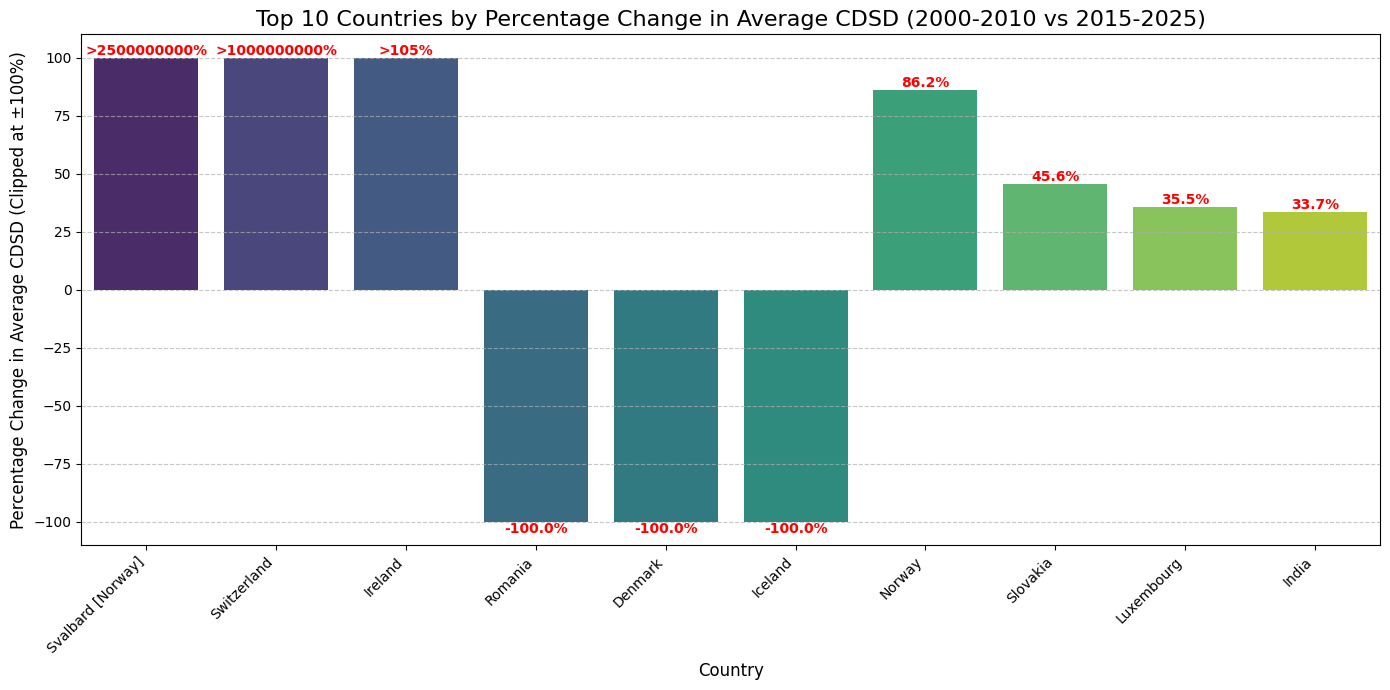

**Explanation for CDSD:** Cooling Degree Days with respect to a 18.3 C or 65 F base, Summer season.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


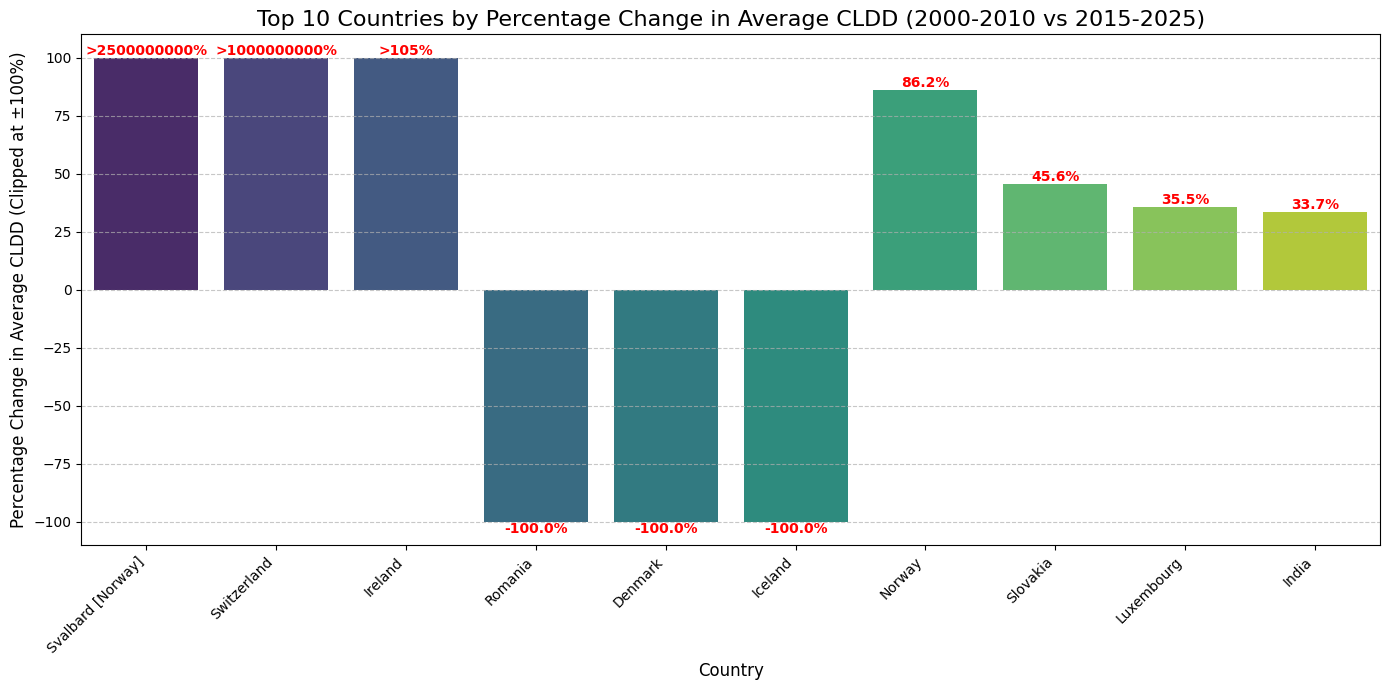

**Explanation for CLDD:** Cooling Degree Days with respect to a 18.3 C or 65 F base, Annual.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


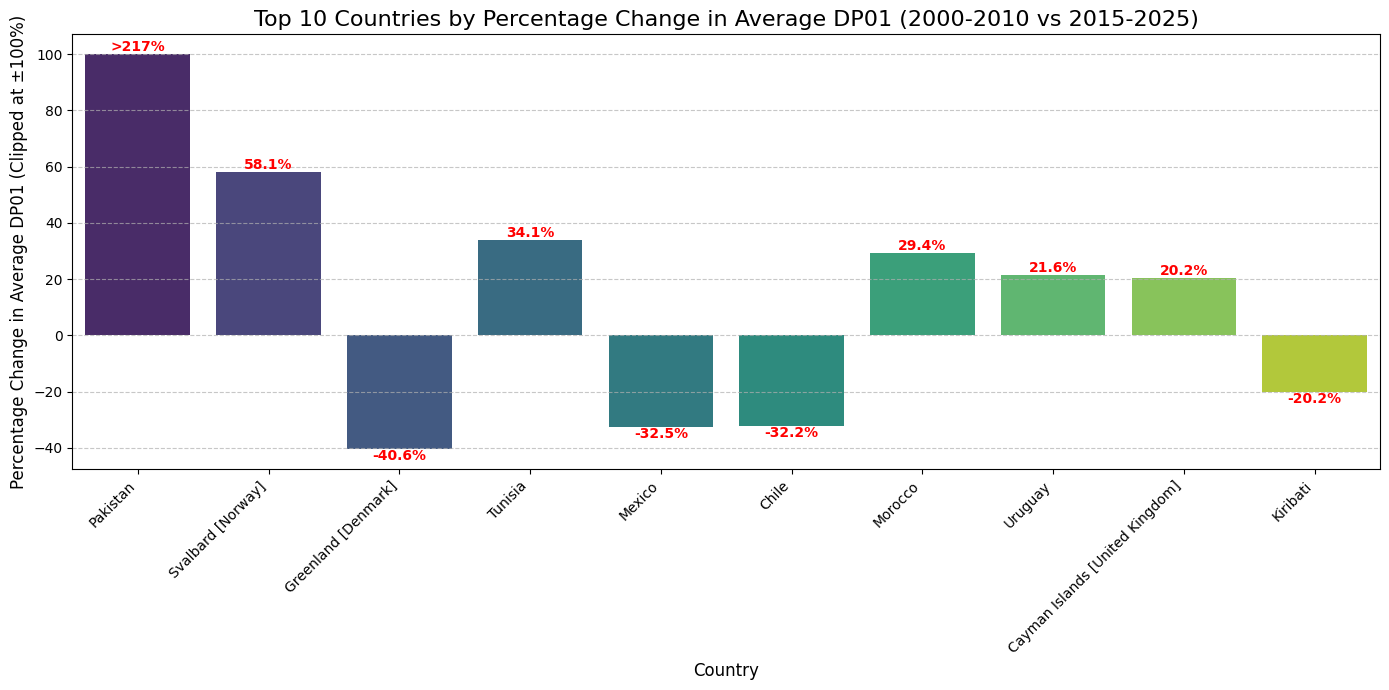

**Explanation for DP01:** Days with Precipitation >= 1 mm.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


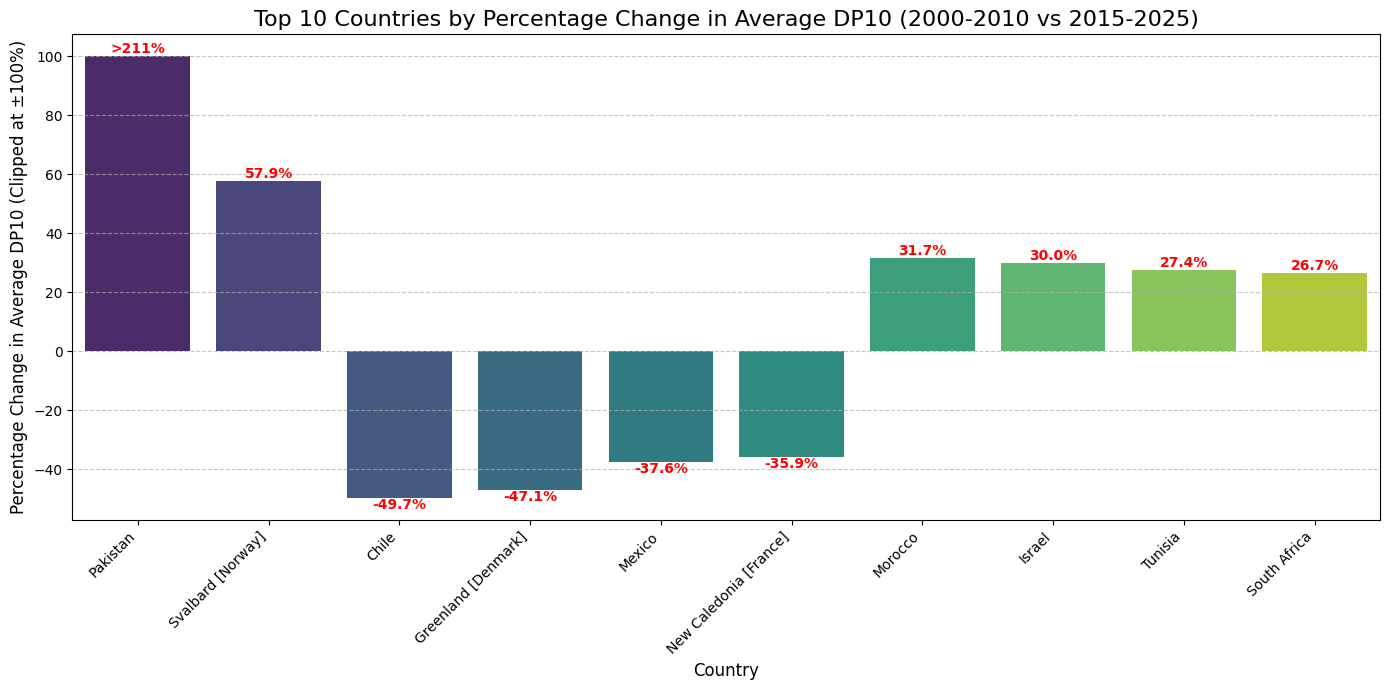

**Explanation for DP10:** Days with Precipitation >= 10 mm.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


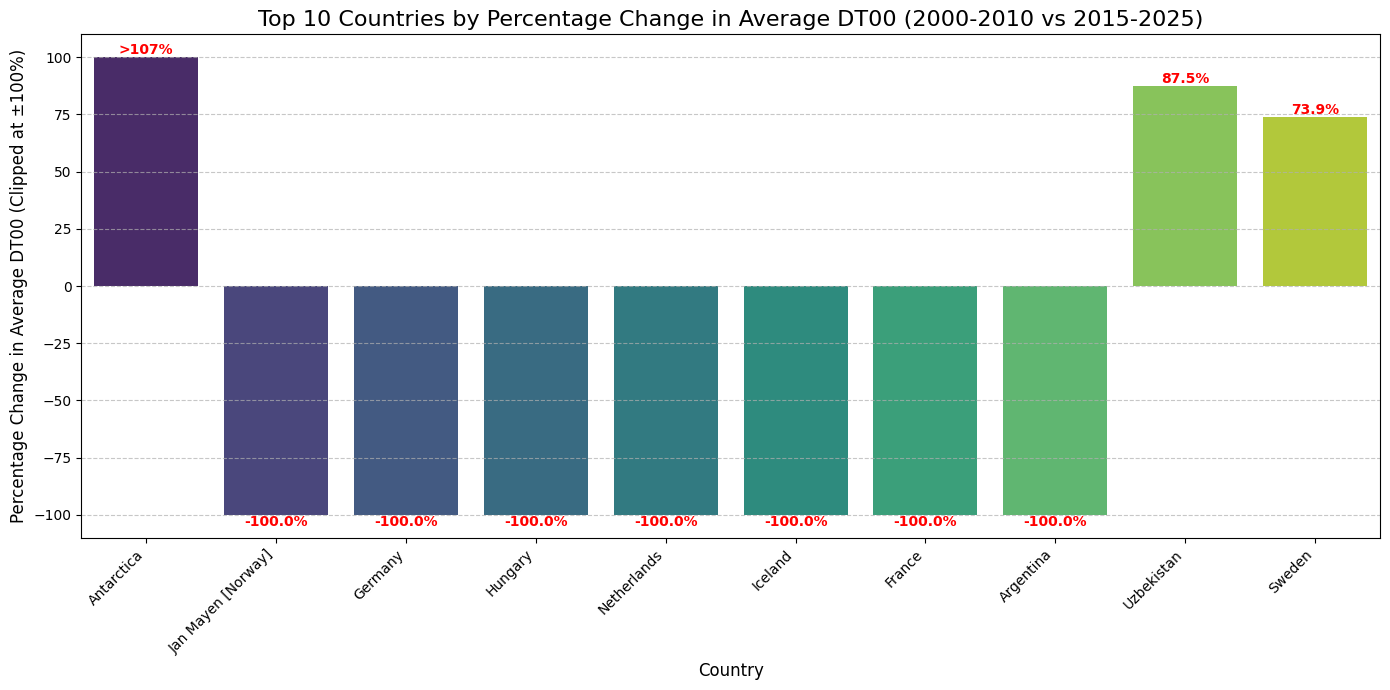

**Explanation for DT00:** Days with Minimum Temperature <= 0.0 C.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


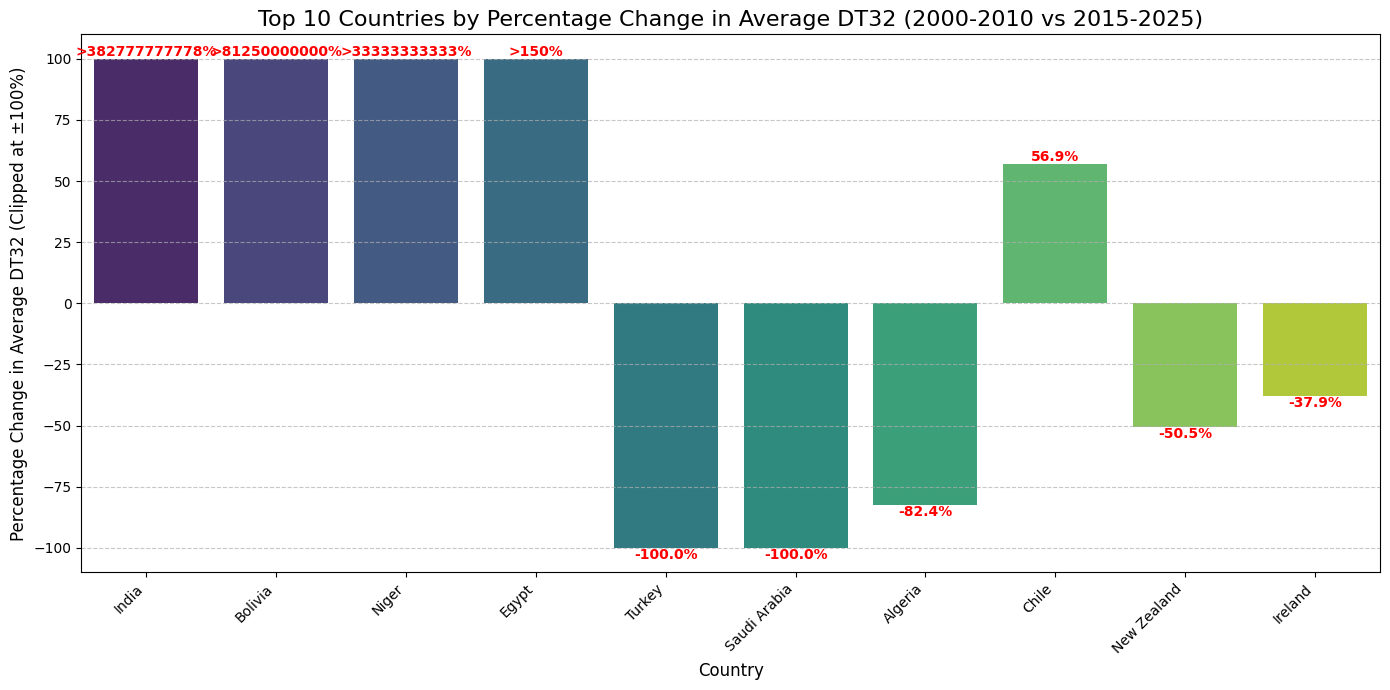

**Explanation for DT32:** Days with Minimum Temperature <= 32.0 F (0.0 C).
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


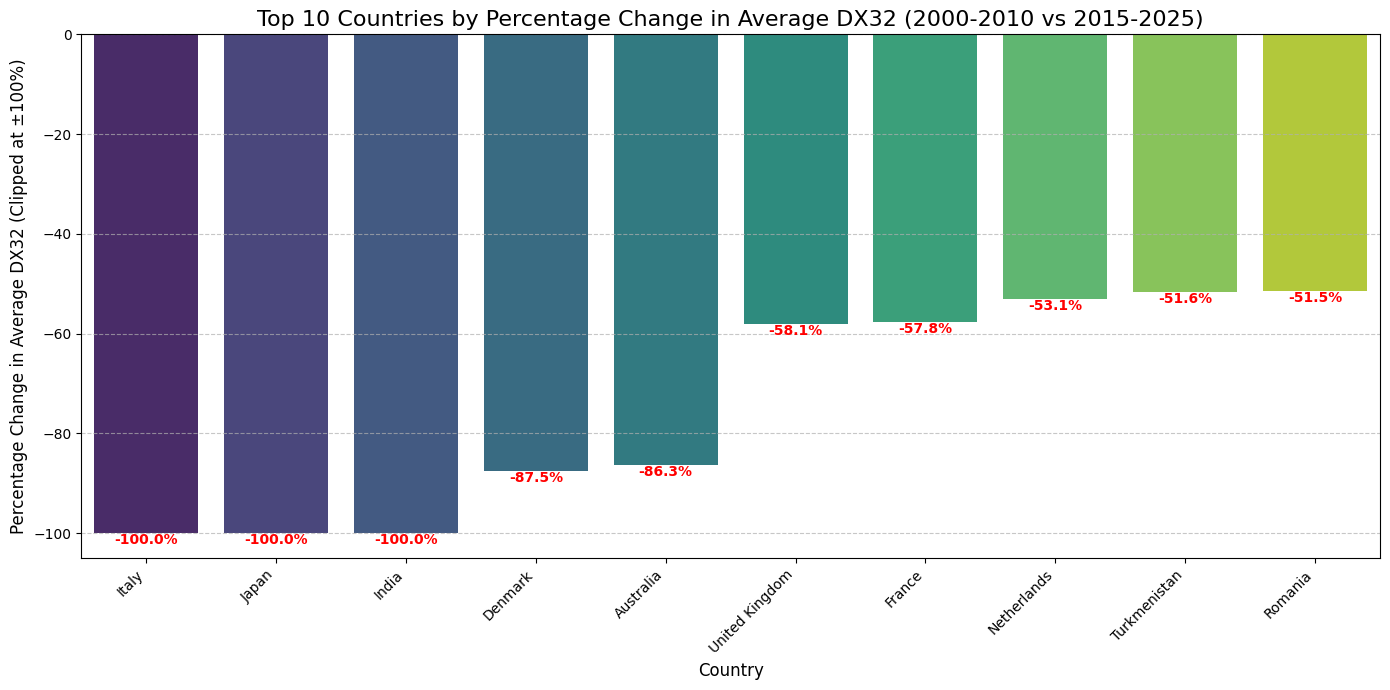

**Explanation for DX32:** Days with Maximum Temperature <= 32.0 F (0.0 C).
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


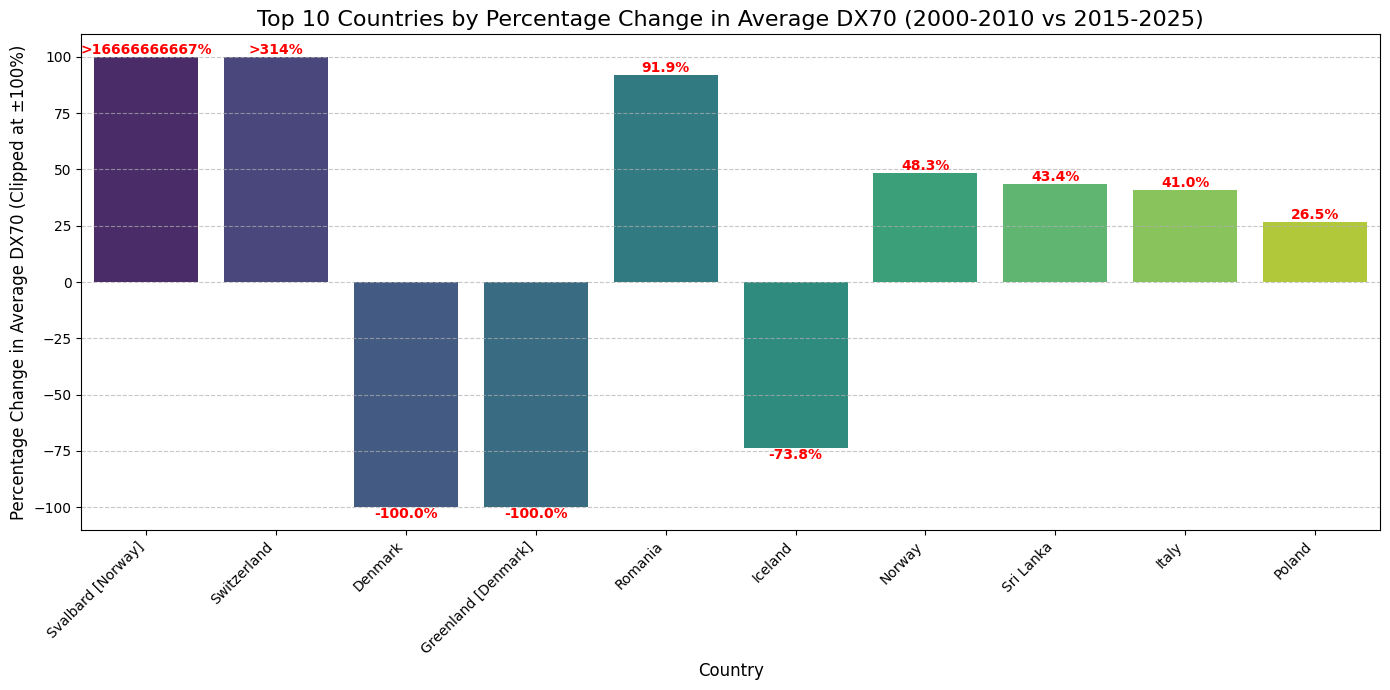

**Explanation for DX70:** Days with Maximum Temperature >= 70.0 F (21.1 C).
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


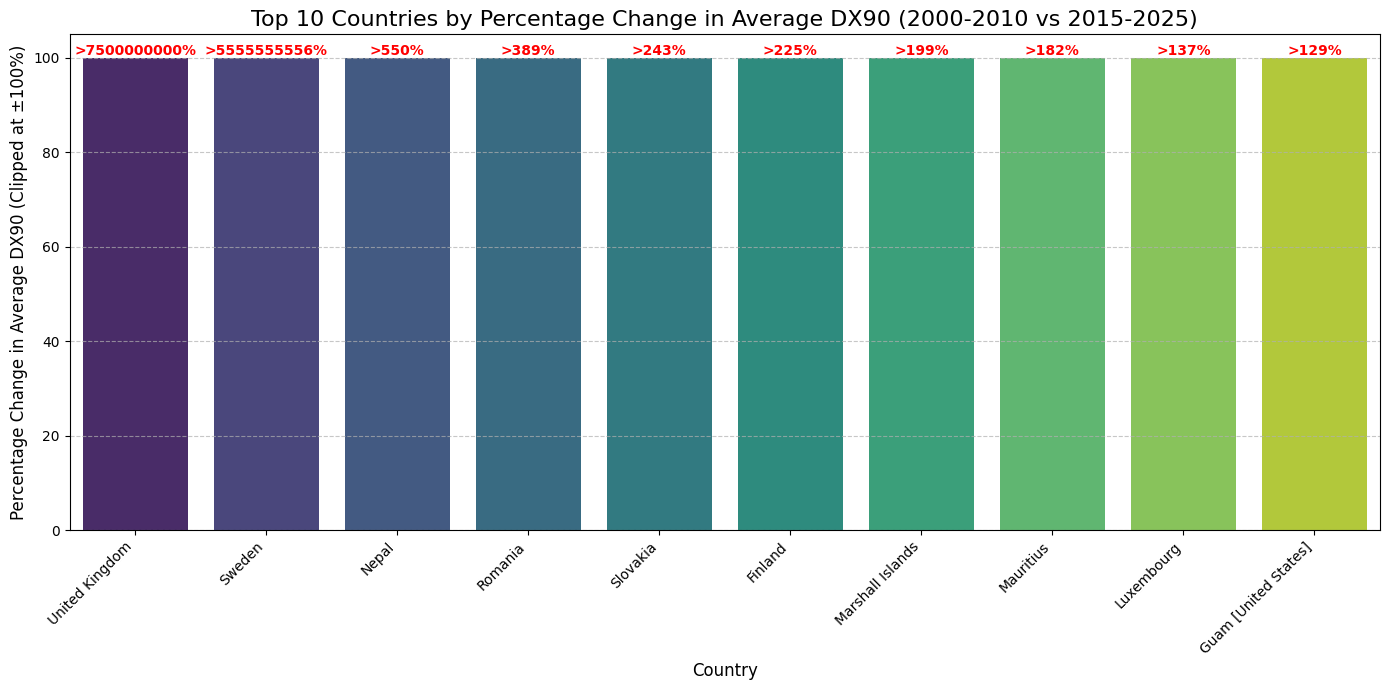

**Explanation for DX90:** Days with Maximum Temperature >= 90.0 F (32.2 C).
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


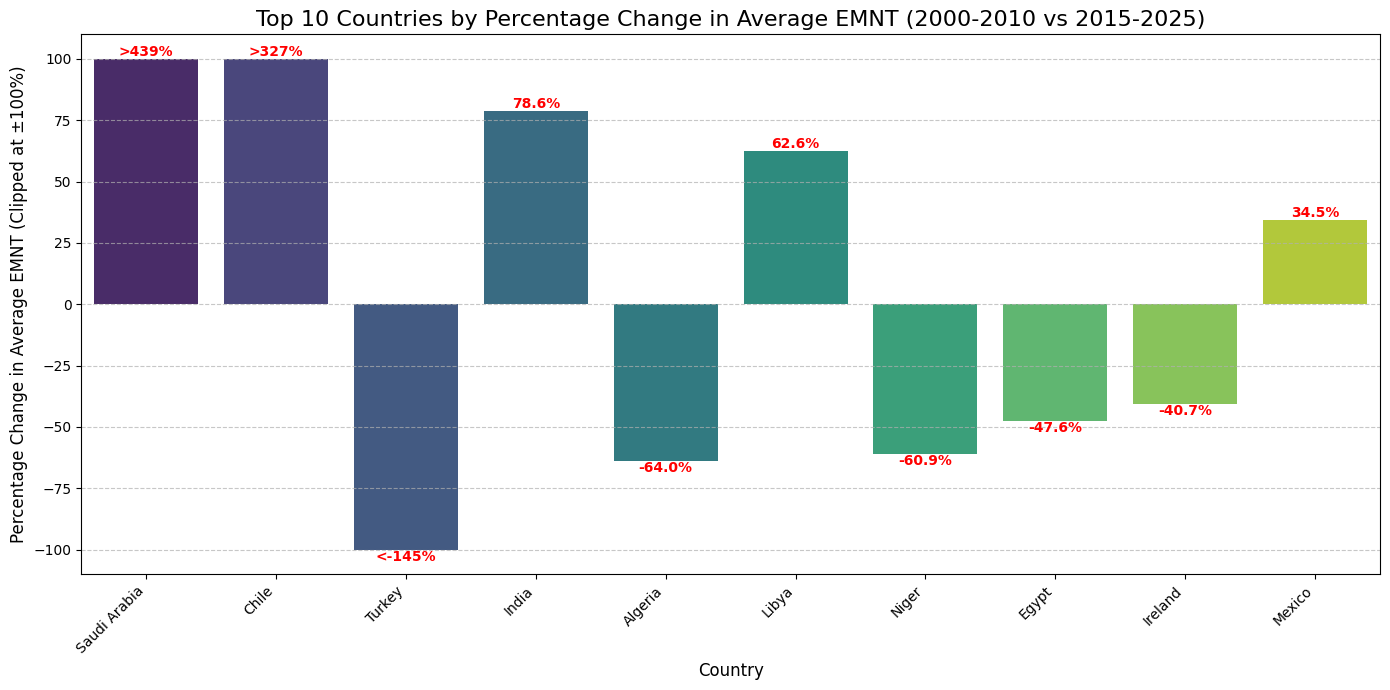

**Explanation for EMNT:** Extreme Minimum Temperature for the year.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


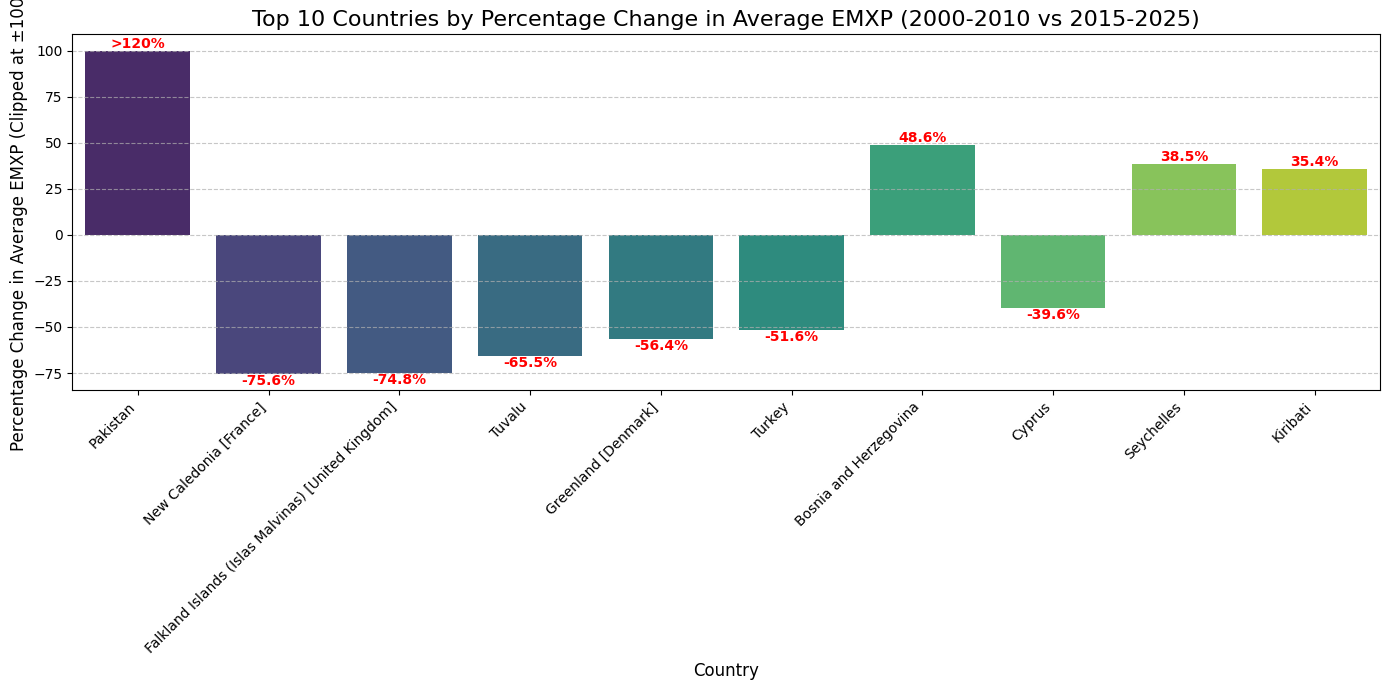

**Explanation for EMXP:** Extreme Maximum Precipitation for the year.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


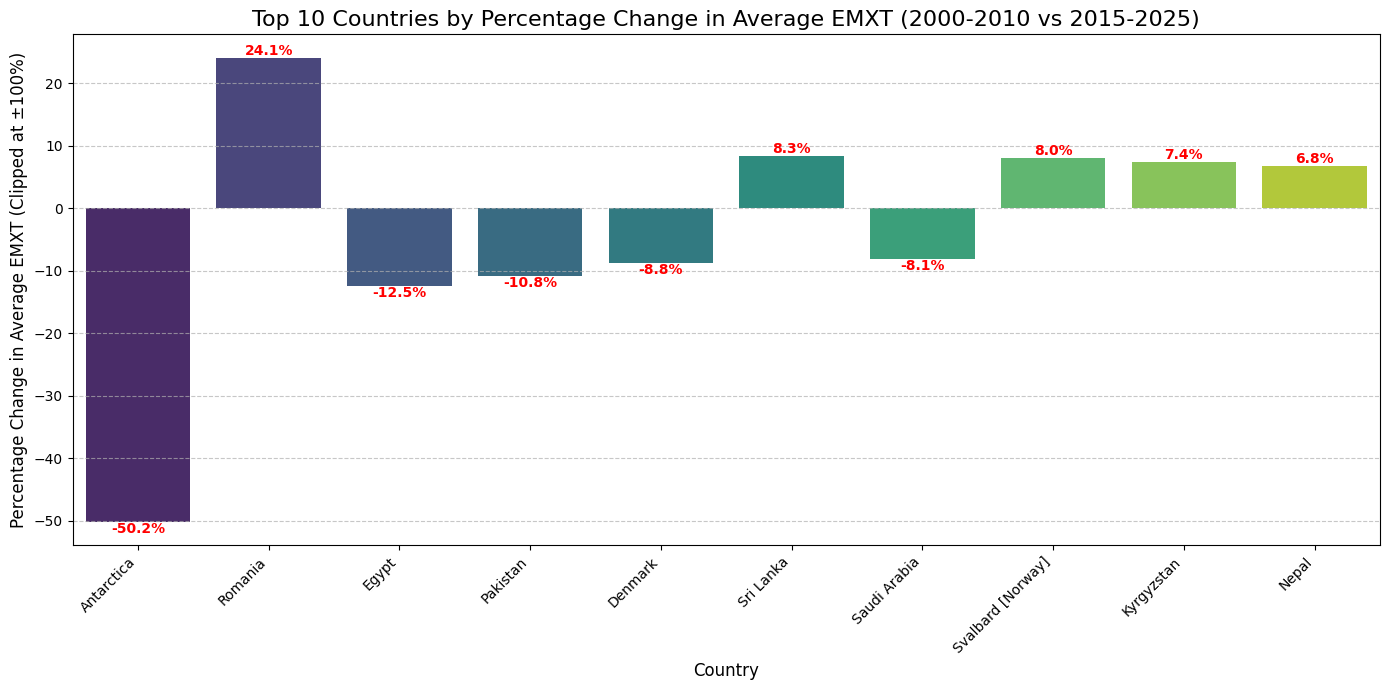

**Explanation for EMXT:** Extreme Maximum Temperature for the year.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


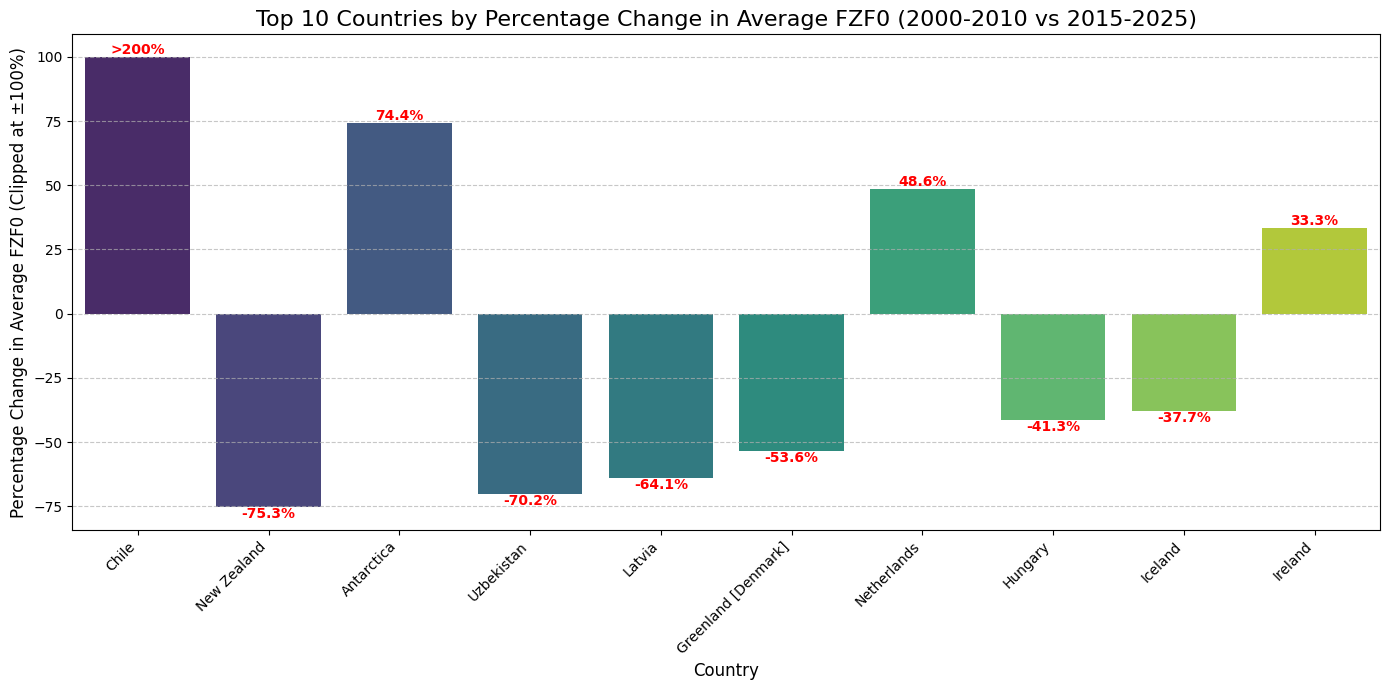

**Explanation for FZF0:** Days with Minimum Frost Temperature <= 0.0 C.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


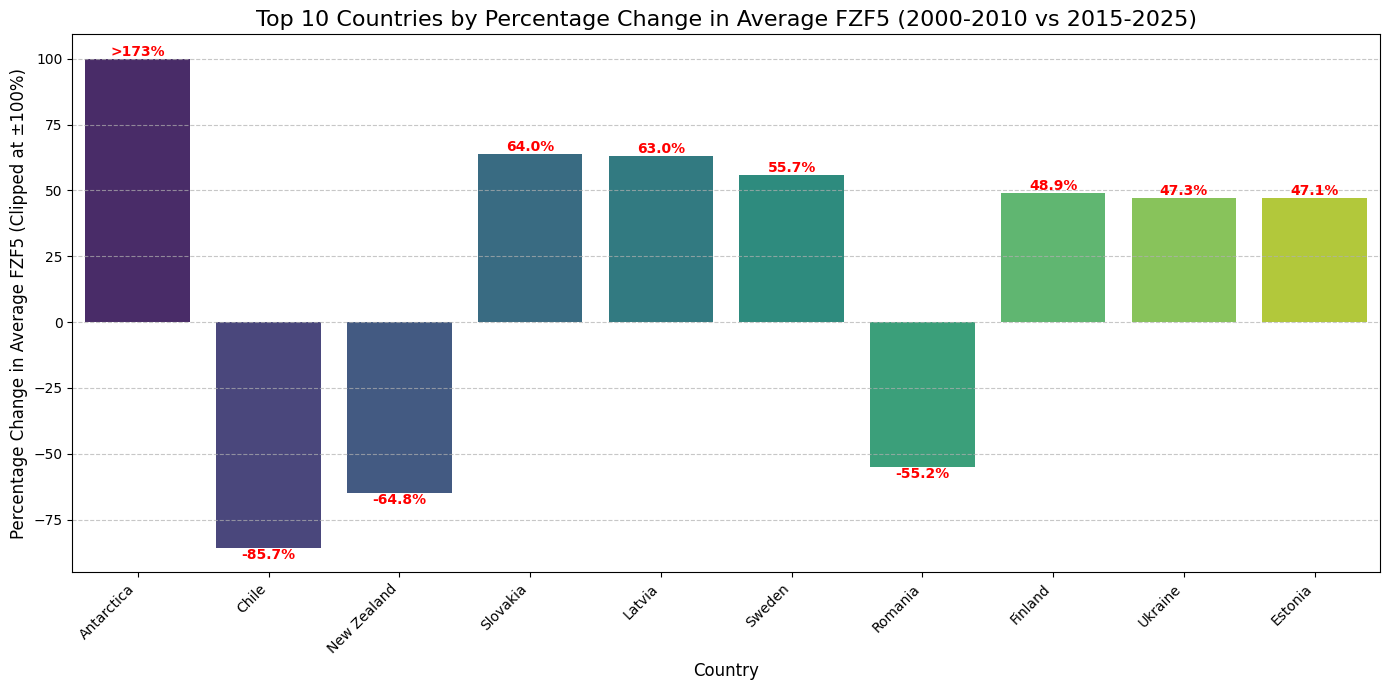

**Explanation for FZF5:** Days with Minimum Frost Temperature <= -2.2 C (28 F).
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


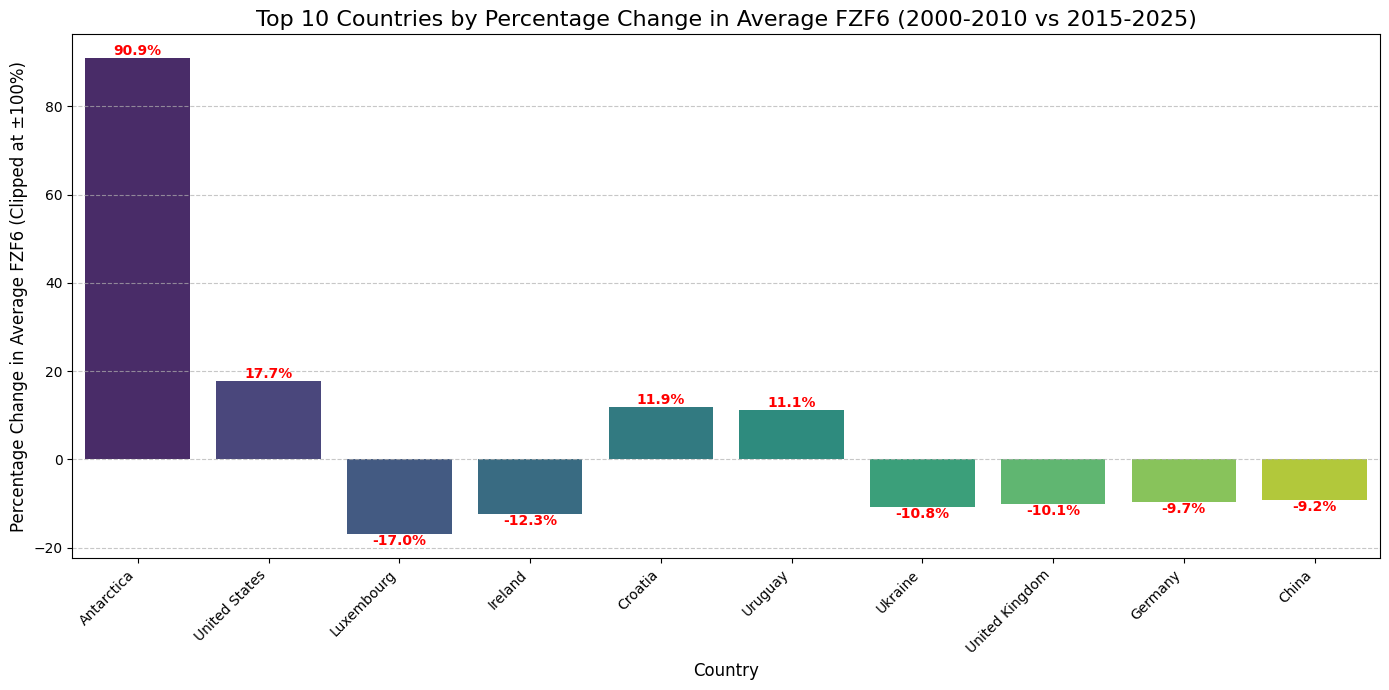

**Explanation for FZF6:** Days with Minimum Frost Temperature <= -5.6 C (22 F).
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


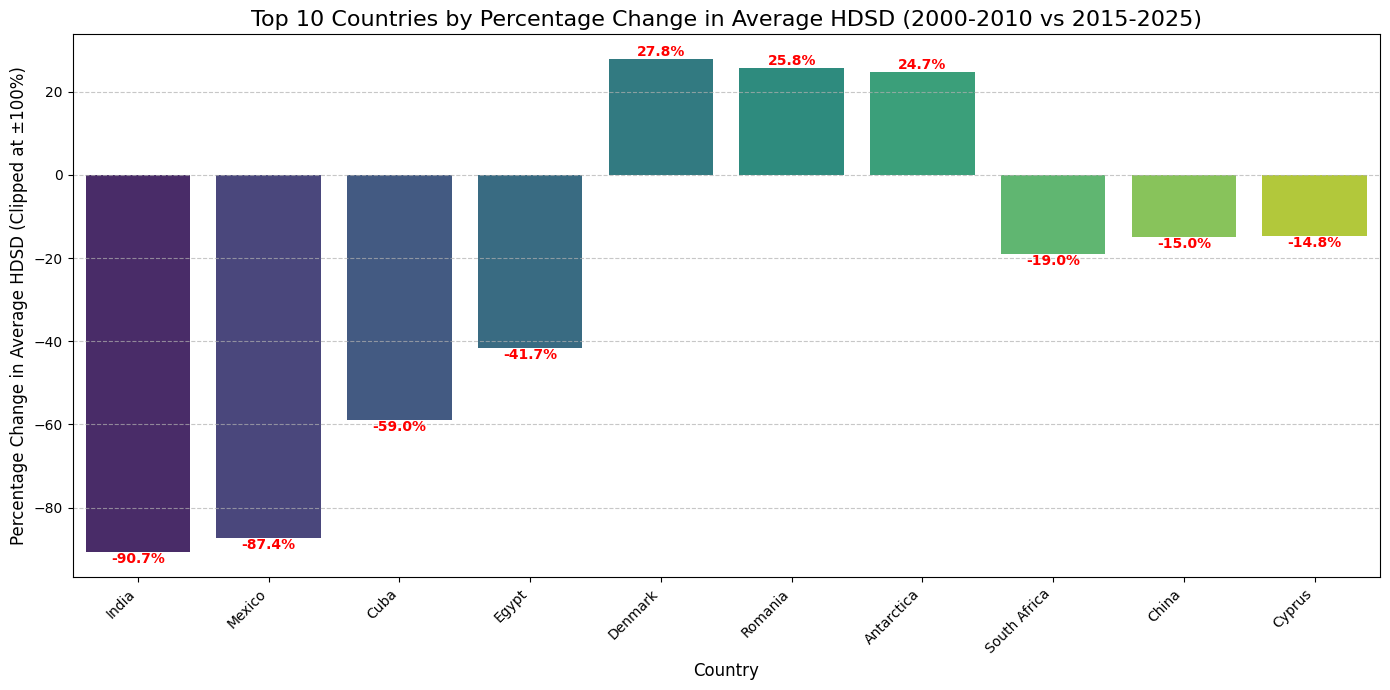

**Explanation for HDSD:** Heating Degree Days with respect to a 18.3 C or 65 F base, Summer season.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


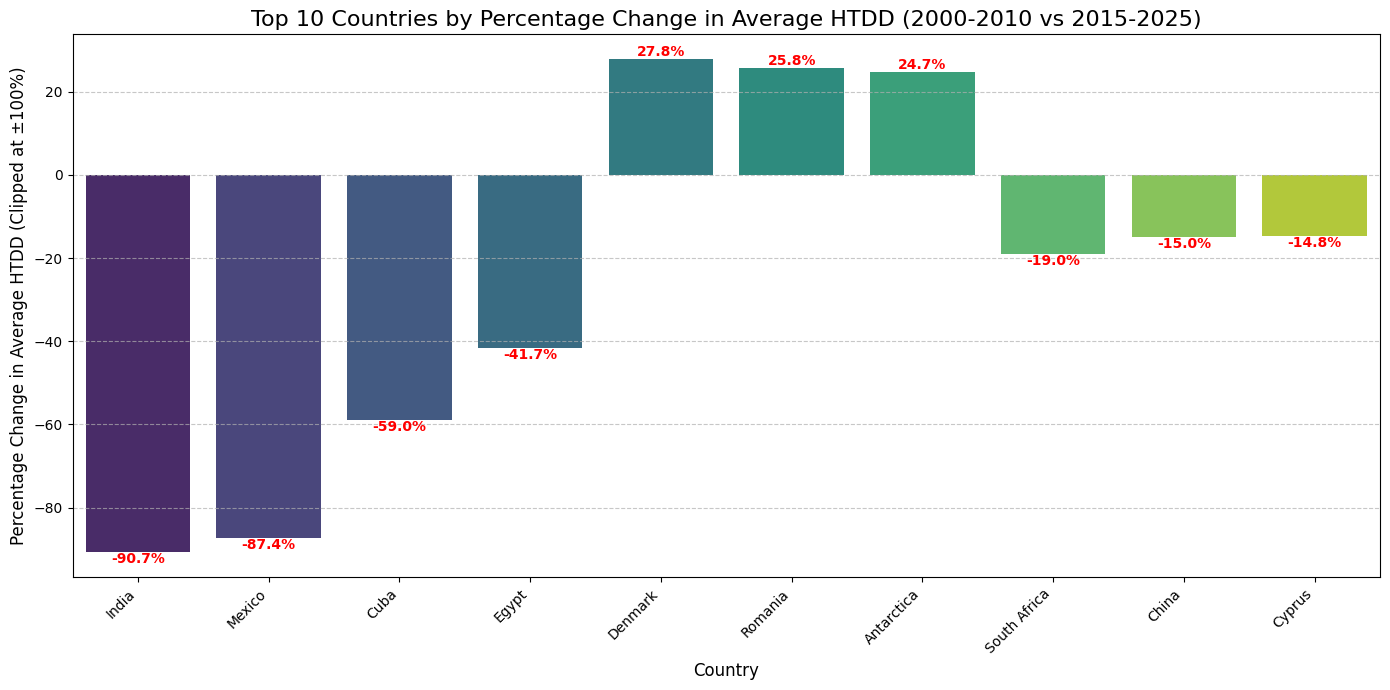

**Explanation for HTDD:** Heating Degree Days with respect to a 18.3 C or 65 F base, Winter season.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


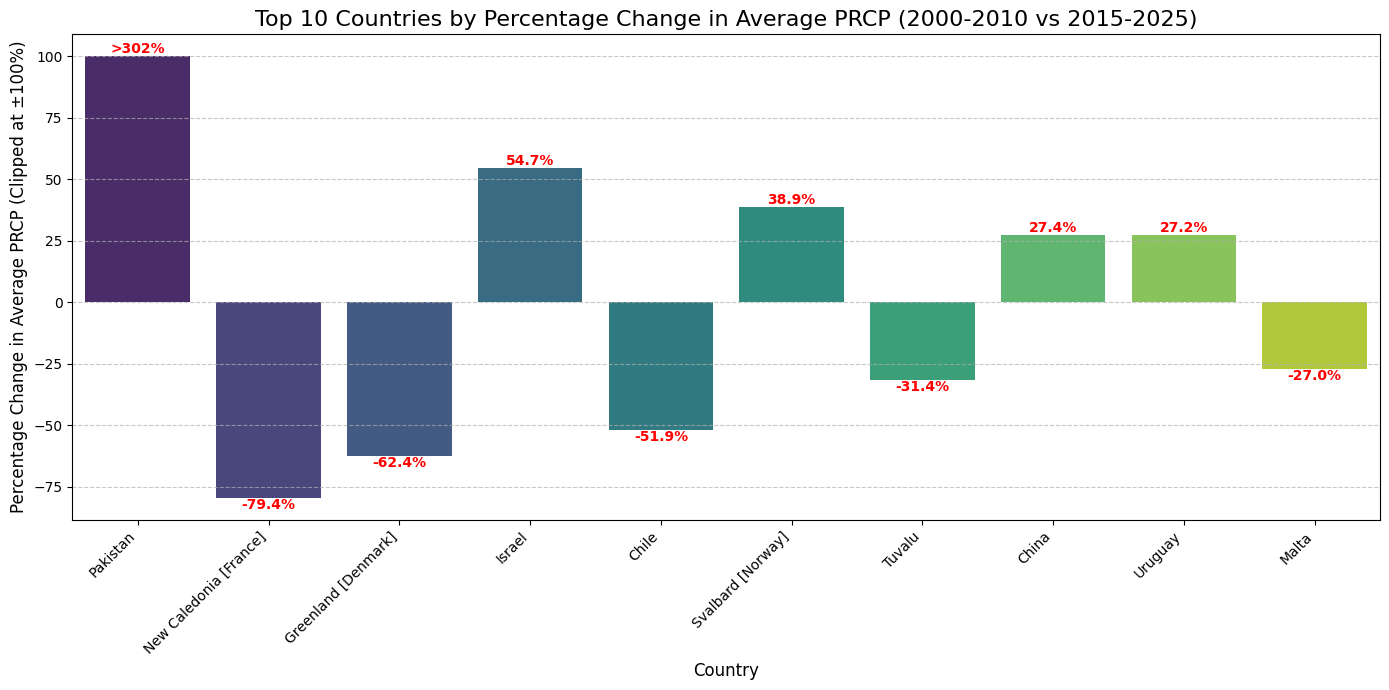

**Explanation for PRCP:** Total Precipitation for the year.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


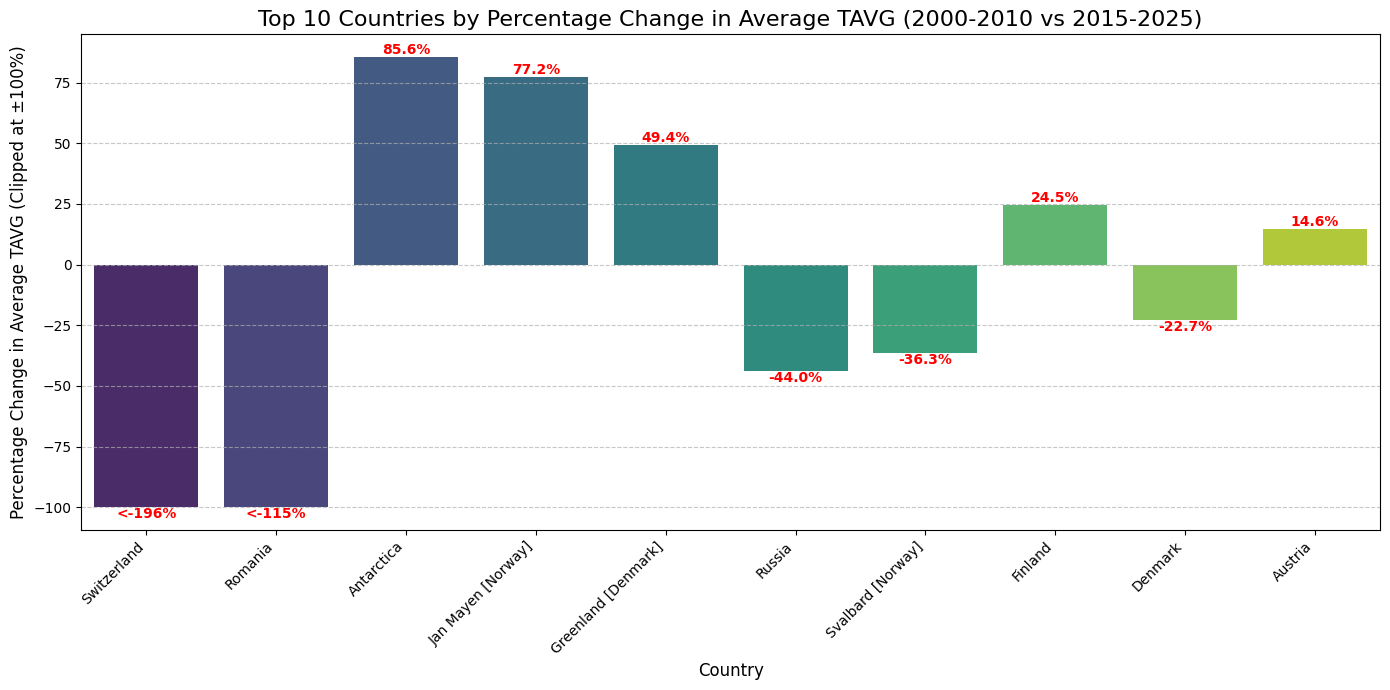

**Explanation for TAVG:** Average Temperature for the year.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


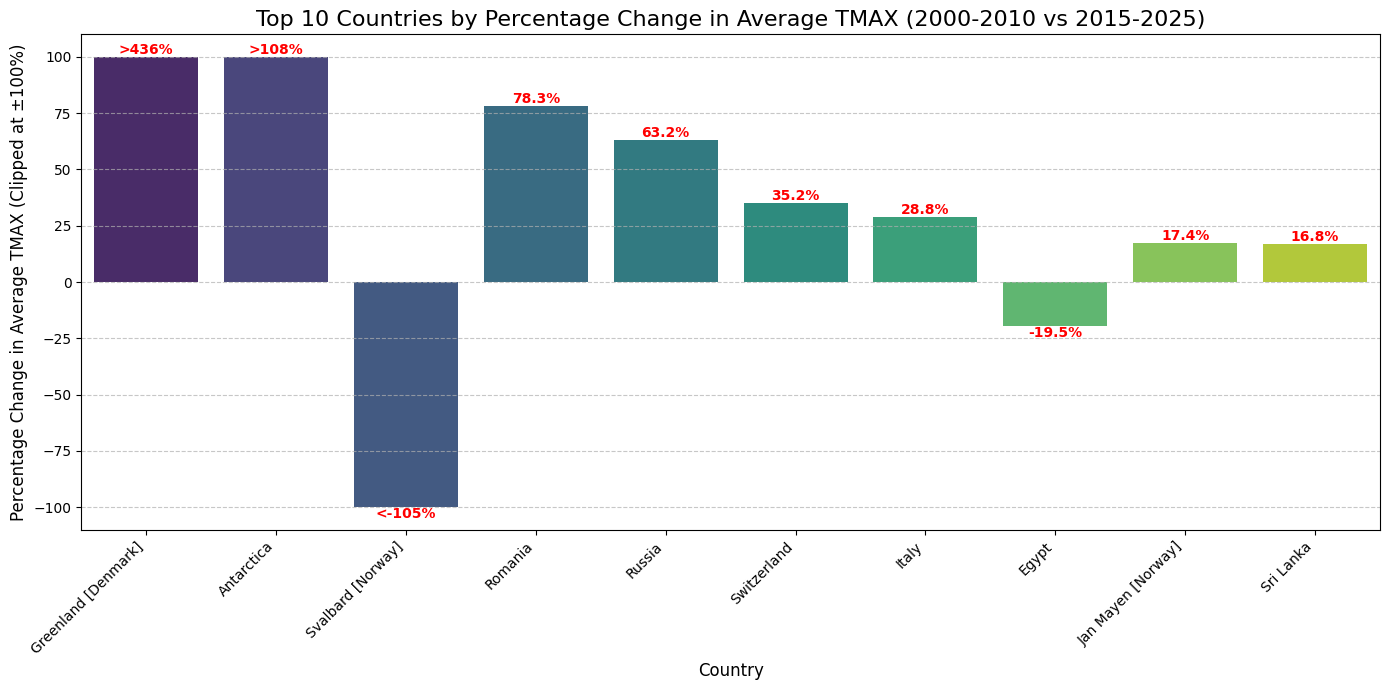

**Explanation for TMAX:** Average Maximum Temperature for the year.
--------------------------------------------------


/tmp/ipython-input-226-2348766657.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')


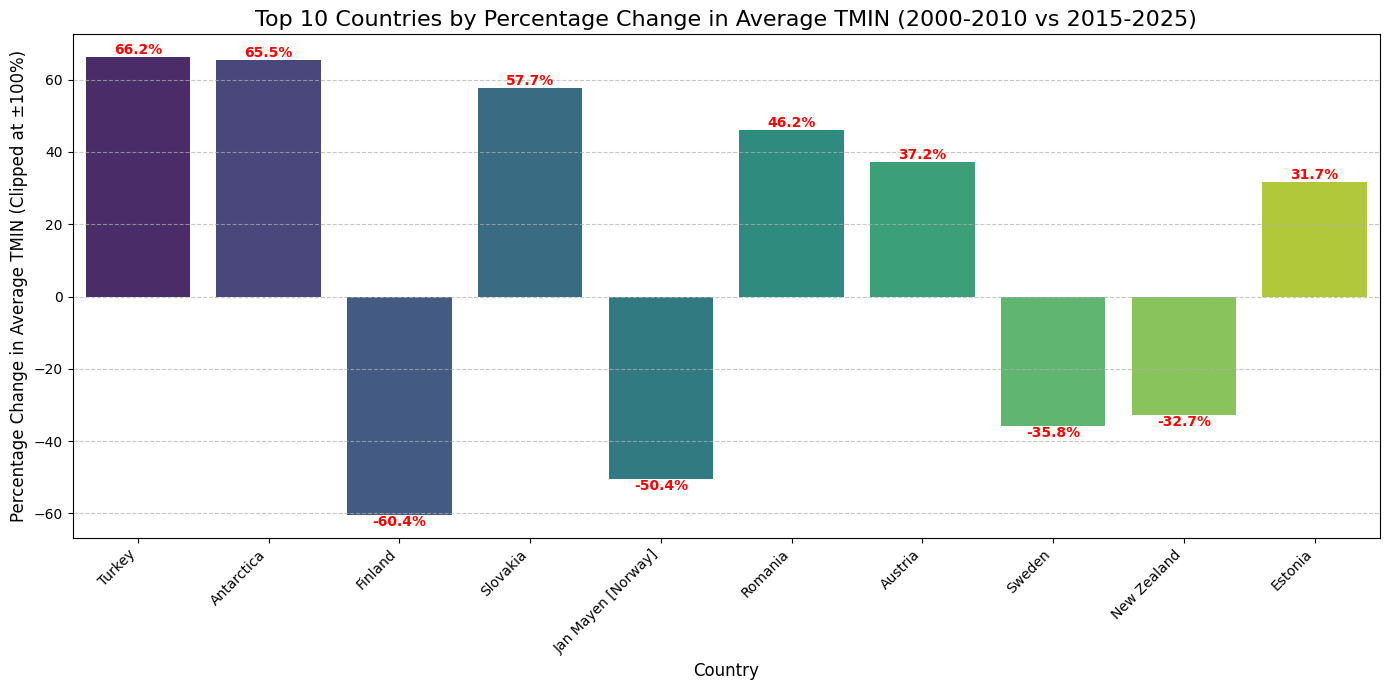

**Explanation for TMIN:** Average Minimum Temperature for the year.
--------------------------------------------------


In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for clipping

# Define the number of top countries to display in the graphs
top_n = 10

# Dictionary to store explanations for each factor (add more explanations as needed)
factor_explanations = {
    'TAVG': 'Average Temperature for the year.',
    'TMIN': 'Average Minimum Temperature for the year.',
    'TMAX': 'Average Maximum Temperature for the year.',
    'PRCP': 'Total Precipitation for the year.',
    'CDSD': 'Cooling Degree Days with respect to a 18.3 C or 65 F base, Summer season.',
    'CLDD': 'Cooling Degree Days with respect to a 18.3 C or 65 F base, Annual.',
    'DP01': 'Days with Precipitation >= 1 mm.',
    'DP10': 'Days with Precipitation >= 10 mm.',
    'DT00': 'Days with Minimum Temperature <= 0.0 C.',
    'DT32': 'Days with Minimum Temperature <= 32.0 F (0.0 C).',
    'DX32': 'Days with Maximum Temperature <= 32.0 F (0.0 C).',
    'DX70': 'Days with Maximum Temperature >= 70.0 F (21.1 C).',
    'DX90': 'Days with Maximum Temperature >= 90.0 F (32.2 C).',
    'EMNT': 'Extreme Minimum Temperature for the year.',
    'EMXP': 'Extreme Maximum Precipitation for the year.',
    'EMXT': 'Extreme Maximum Temperature for the year.',
    'FZF0': 'Days with Minimum Frost Temperature <= 0.0 C.',
    'FZF5': 'Days with Minimum Frost Temperature <= -2.2 C (28 F).',
    'FZF6': 'Days with Minimum Frost Temperature <= -5.6 C (22 F).',
    'HDSD': 'Heating Degree Days with respect to a 18.3 C or 65 F base, Summer season.',
    'HTDD': 'Heating Degree Days with respect to a 18.3 C or 65 F base, Winter season.'
}

# Define the clipping threshold for plotting the bars
clip_threshold_plot = 100

# Define the clipping threshold for annotations
clip_threshold_annotation = 1000

# Loop through each change dataframe in the dictionary
for factor_change_name, change_df in change_dataframes.items():
    # Extract the factor name (e.g., 'TAVG' from 'TAVG_change')
    factor = factor_change_name.replace('_change', '')

    # Ensure the change percentage column exists
    change_col = f'{factor}_Change_Percent'
    if change_col not in change_df.columns:
        print(f"Skipping {factor}: Change percentage column '{change_col}' not found.")
        continue

    # Drop rows with NaN in the change percentage column
    change_df_cleaned = change_df.dropna(subset=[change_col]).copy()

    # Sort by absolute percentage change to get top N regardless of direction
    change_df_cleaned['Abs_Change_Percent'] = change_df_cleaned[change_col].abs()
    top_countries = change_df_cleaned.sort_values(by='Abs_Change_Percent', ascending=False).head(top_n).reset_index(drop=True) # Reset index for easier plotting

    if top_countries.empty:
        print(f"No sufficient data to plot for {factor}.")
        continue

    # Create a column for plotting, clipping values above the threshold for bars
    top_countries['Plotting_Change_Percent'] = np.clip(top_countries[change_col], -clip_threshold_plot, clip_threshold_plot)


    # Create the bar plot
    plt.figure(figsize=(14, 7))
    # Use the 'COUNTRY' column for the x-axis
    sns.barplot(x='COUNTRY', y='Plotting_Change_Percent', data=top_countries, palette='viridis')

    # Add titles and labels
    plt.title(f'Top {top_n} Countries by Percentage Change in Average {factor} (2000-2010 vs 2015-2025)', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel(f'Percentage Change in Average {factor} (Clipped at ±{clip_threshold_plot}%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Add annotations for percentage change with the new threshold
    for index, row in top_countries.iterrows():
        actual_change = row[change_col]
        plotting_change = row['Plotting_Change_Percent']
        country = row['COUNTRY']

        if abs(actual_change) > clip_threshold_annotation:
            annotation_text = f'>{clip_threshold_annotation}%' if actual_change > 0 else f'<-{clip_threshold_annotation}%'
        else:
            annotation_text = f'{actual_change:.1f}%'

        # Adjust vertical alignment based on the sign of the plotting value
        va = 'bottom' if plotting_change >= 0 else 'top'
        # Adjust vertical position slightly to not overlap the bar edge
        y_position = plotting_change + (plt.ylim()[1] * 0.02 if plotting_change >= 0 else plt.ylim()[0] * 0.02)


        # Use the positional index (from the loop) for text placement
        plt.text(index, plotting_change, annotation_text, ha='center', va=va, color='red', fontweight='bold')


    plt.show()

    # Print the explanation for the factor
    print(f"**Explanation for {factor}:** {factor_explanations.get(factor, 'Explanation not available.')}")
    print("-" * 50) # Separator for clarity

In [ ]:
#Some graphs scale are not good...so changing the scale to better represent the data...

In [ ]:
#And yeah, we have to find the most riskiest countries on most important factors..because we are not going to include all the factors....and some factors will be weighted more for eg: max temp, or days with 90 degress  or prcp which can cause flood...etc...But it is subjective and depends upon the geography of the country...what do you think is good way?